# Data Cleaning - Airdna Data
by Zahratu Shabrina

In this notebook, we are looking to explore Airbnb data in Bandung and Jakarta, Indonesia. The data was collected through Airdna and contains the listings information from 2016 to 2020. The data was obtained through a grant, led by Adiwan F. Aritenang, ST., M.GIT., Ph.D.

There are two dataset for each city:
1. Monthly match (longitudinal data containing all the listings within the given timeframe, scrapped monthly)
2. Property Extended match (cross-sectional data of the property available in Airbnb by the time of the data collection)

In [1]:
# Import the necessary libraries

import matplotlib as mpl
# Make sure output is into notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import datetime as dt
import os
import seaborn; seaborn.set()
import seaborn as sns
#from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from datetime import datetime

# ignore warnings message presence
import warnings
warnings.simplefilter('ignore')

In [2]:
!pwd

/Users/k1929112/Library/CloudStorage/OneDrive-King'sCollegeLondon/ITB Project


# Cross-sectional Data

## Bandung Airbnb Data

In [3]:
# Read the Airbnb listings data based on the cross-sectional (cs) data
airbnb_bdg_cs = pd.read_csv(os.path.join('Updated data 2020','Indonesia-bandung_Property_Extended_Match_2020-07-20.csv'))
airbnb_bdg_cs.head()

,Property ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,State,City,Zipcode,...,Integrated Property Manager,Amenities,HomeAway Location Type,Airbnb Property Plus,Airbnb Home Collection,License,Airbnb Property ID,Airbnb Host ID,HomeAway Property ID,HomeAway Property Manager ID
0,ab-181481,A place amongst green pines at Bandung Cipaku ...,House,Entire home/apt,2011-07-24,2020-07-19,Indonesia,West Java,Bandung,NaN,...,NaN,"[""wireless_internet"", ""kitchen"", ""free_parking...",NaN,NaN,NaN,NaN,181481.0,869350.0,NaN,NaN
1,ab-548934,apartmen bandung westjava indonesia,Apartment,Private room,2012-06-20,2017-05-04,Indonesia,West Java,Bandung,NaN,...,NaN,"[""family_friendly"", ""event_friendly""]",NaN,NaN,NaN,NaN,548934.0,2692326.0,NaN,NaN
2,ab-736264,Lamping GuestHouse Bandung - all 5 room for 10...,House,Entire home/apt,2012-10-11,2020-07-19,Indonesia,West Java,Bandung,NaN,...,NaN,"[""wireless_internet"", ""kitchen"", ""free_parking...",NaN,NaN,NaN,NaN,736264.0,3484918.0,NaN,NaN
3,ab-901887,Chez Bon Backpackers Hostel,Bed &amp; Breakfast,Shared room,2013-01-22,2016-05-07,Indonesia,West Java,Bandung,NaN,...,NaN,"[""kitchen"", ""tv"", ""ac"", ""washer"", ""dryer"", ""wi...",NaN,NaN,NaN,NaN,901887.0,4818464.0,NaN,NaN
4,ab-917306,Chez Bon Backpackers Room 3,Bed & Breakfast,Shared room,2013-02-01,2017-09-29,Indonesia,West Java,Bandung,NaN,...,NaN,"[""wireless_internet"", ""family_friendly"", ""kitc...",NaN,NaN,NaN,NaN,917306.0,4818464.0,NaN,NaN


In [4]:
airbnb_bdg_cs.columns

Index(['Property ID', 'Listing Title', 'Property Type', 'Listing Type',
       'Created Date', 'Last Scraped Date', 'Country', 'State', 'City',
       'Zipcode', 'Neighborhood', 'Metropolitan Statistical Area',
       'Currency Native', 'Average Daily Rate (USD)',
       'Average Daily Rate (Native)', 'Annual Revenue LTM (USD)',
       'Annual Revenue LTM (Native)', 'Occupancy Rate LTM',
       'Number of Bookings LTM', 'Number of Reviews', 'Bedrooms', 'Bathrooms',
       'Max Guests', 'Calendar Last Updated', 'Response Rate',
       'Airbnb Response Time (Text)', 'Airbnb Superhost',
       'HomeAway Premier Partner', 'Cancellation Policy',
       'Security Deposit (USD)', 'Security Deposit (Native)',
       'Cleaning Fee (USD)', 'Cleaning Fee (Native)', 'Extra People Fee (USD)',
       'Extra People Fee (Native)', 'Published Nightly Rate (USD)',
       'Published Monthly Rate (USD)', 'Published Weekly Rate (USD)',
       'Check-in Time', 'Checkout Time', 'Minimum Stay',
       'Count 

In [5]:
# Checking the shape of the dataframe
airbnb_bdg_cs.shape

(5057, 70)

In [6]:
airbnb_bdg_cs.describe()

,Zipcode,Neighborhood,Metropolitan Statistical Area,Average Daily Rate (USD),Average Daily Rate (Native),Annual Revenue LTM (USD),Annual Revenue LTM (Native),Occupancy Rate LTM,Number of Bookings LTM,Number of Reviews,...,Airbnb Accuracy Rating,Airbnb Cleanliness Rating,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Airbnb Property Plus,Airbnb Home Collection,License,Airbnb Property ID,Airbnb Host ID
count,0.0,0.0,0.0,2501.000000,2.484000e+03,5045.000000,4.738000e+03,2501.000000,5045.000000,5043.000000,...,2049.000000,2052.000000,2047.000000,2049.000000,2047.000000,0.0,0.0,0.0,4.749000e+03,4.748000e+03
mean,NaN,NaN,NaN,42.903427,5.532023e+05,859.857483,1.204744e+07,0.291182,7.272547,6.534008,...,9.083455,8.670078,9.401563,9.339190,8.964827,NaN,NaN,NaN,2.613936e+07,1.456247e+08
std,NaN,NaN,NaN,47.172710,6.551950e+05,2833.080162,4.092223e+07,0.233266,16.666019,20.215042,...,1.520165,1.659399,1.309398,1.143354,1.504225,NaN,NaN,NaN,9.947320e+06,8.799750e+07
min,NaN,NaN,NaN,9.000000,1.000000e+01,0.000000,0.000000e+00,0.032000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,NaN,NaN,1.814810e+05,1.887860e+05
25%,NaN,NaN,NaN,20.970000,2.700000e+05,0.000000,0.000000e+00,0.107000,0.000000,0.000000,...,9.000000,8.000000,9.000000,9.000000,9.000000,NaN,NaN,NaN,1.819793e+07,6.834208e+07
50%,NaN,NaN,NaN,28.500000,3.858815e+05,0.000000,1.196000e+03,0.230000,0.000000,0.000000,...,10.000000,9.000000,10.000000,10.000000,9.000000,NaN,NaN,NaN,2.654094e+07,1.367613e+08
75%,NaN,NaN,NaN,43.000000,5.715470e+05,684.000000,9.083829e+06,0.411000,6.000000,3.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,NaN,3.487864e+07,2.185368e+08
max,NaN,NaN,NaN,661.750000,9.300000e+06,78270.000000,1.141250e+09,1.000000,149.000000,287.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,NaN,4.409209e+07,3.538967e+08


In [7]:
# Let's check how many data has at least one review as a proxy for active Airbnb listings
airbnb_bdg_csactive=airbnb_bdg_cs.loc[(airbnb_bdg_cs['Number of Reviews']>5)] #We can see that only 2183 data are active listings
airbnb_bdg_csactive.shape

(919, 70)

In [8]:
airbnb_bdg_csactive.describe()

,Zipcode,Neighborhood,Metropolitan Statistical Area,Average Daily Rate (USD),Average Daily Rate (Native),Annual Revenue LTM (USD),Annual Revenue LTM (Native),Occupancy Rate LTM,Number of Bookings LTM,Number of Reviews,...,Airbnb Accuracy Rating,Airbnb Cleanliness Rating,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Airbnb Property Plus,Airbnb Home Collection,License,Airbnb Property ID,Airbnb Host ID
count,0.0,0.0,0.0,783.000000,7.830000e+02,919.000000,9.190000e+02,783.000000,919.000000,919.000000,...,919.000000,919.000000,919.000000,919.000000,919.000000,0.0,0.0,0.0,9.190000e+02,9.190000e+02
mean,NaN,NaN,NaN,42.679157,5.688460e+05,2969.330794,4.016871e+07,0.387936,26.984766,33.128400,...,9.482046,9.092492,9.721436,9.582155,9.368879,NaN,NaN,NaN,2.357221e+07,1.202187e+08
std,NaN,NaN,NaN,41.535019,6.047758e+05,5343.845475,7.637957e+07,0.211302,28.140400,37.051322,...,0.707456,0.833097,0.541007,0.606382,0.693849,NaN,NaN,NaN,9.559120e+06,7.896543e+07
min,NaN,NaN,NaN,10.000000,1.000000e+01,0.000000,0.000000e+00,0.032000,0.000000,6.000000,...,5.000000,5.000000,6.000000,6.000000,5.000000,NaN,NaN,NaN,1.814810e+05,3.105880e+05
25%,NaN,NaN,NaN,21.615000,2.922580e+05,509.000000,3.550000e+06,0.230500,3.000000,10.000000,...,9.000000,9.000000,10.000000,9.000000,9.000000,NaN,NaN,NaN,1.671181e+07,5.415763e+07
50%,NaN,NaN,NaN,29.030000,4.000000e+05,1639.000000,2.162500e+07,0.359000,19.000000,19.000000,...,10.000000,9.000000,10.000000,10.000000,9.000000,NaN,NaN,NaN,2.307939e+07,1.083521e+08
75%,NaN,NaN,NaN,44.985000,6.124395e+05,3311.500000,4.615167e+07,0.514500,42.500000,42.500000,...,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,NaN,3.092021e+07,1.720161e+08
max,NaN,NaN,NaN,403.450000,5.882730e+06,78270.000000,1.141250e+09,1.000000,149.000000,287.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,NaN,4.238797e+07,3.192710e+08


<Axes: >

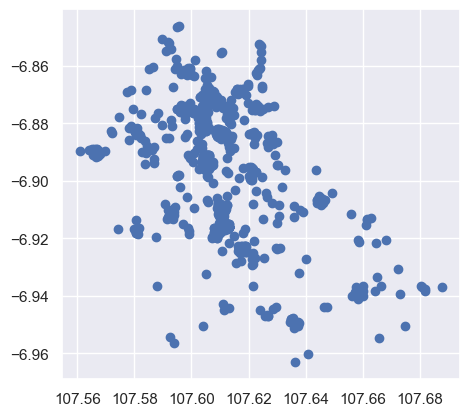

In [9]:
# Turn it into geodataframe using information of latitude and longitude
airbnb_bdg_csactive = gpd.GeoDataFrame(airbnb_bdg_csactive,crs=(4326), geometry=gpd.points_from_xy(airbnb_bdg_csactive.Longitude, airbnb_bdg_csactive.Latitude))
airbnb_bdg_csactive.plot()

## Jakarta Airbnb Data

In [10]:
# Read the Airbnb listings data based on the cross-sectional (cs) data
airbnb_jkt_cs = pd.read_csv(os.path.join('Updated data 2020','Indonesia-jakarta_Property_Extended_Match_2020-07-20.csv'))
airbnb_jkt_cs.head()

,Property ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,State,City,Zipcode,...,Integrated Property Manager,Amenities,HomeAway Location Type,Airbnb Property Plus,Airbnb Home Collection,License,Airbnb Property ID,Airbnb Host ID,HomeAway Property ID,HomeAway Property Manager ID
0,ab-25459578,Pomelotel Hotel,Apartment,Entire home/apt,2018-06-09,2018-07-22,Indonesia,NaN,Jakarta,NaN,...,NaN,"[""wireless_internet"", ""kitchen"", ""elevator"", ""...",NaN,NaN,NaN,NaN,25459578.0,192176605.0,NaN,NaN
1,ab-25459661,CoHaus 3BR High Rise Apt Permata Hijau,Apartment,Entire home/apt,2018-06-09,2019-12-30,Indonesia,NaN,Jakarta,NaN,...,NaN,"[""wireless_internet"", ""kitchen"", ""dryer"", ""ele...",NaN,NaN,NaN,NaN,25459661.0,119699703.0,7148539,travelmob-810190w
2,ab-25459981,A&R Residence,Condominium,Entire home/apt,2019-01-21,2020-07-19,Indonesia,NaN,Jakarta,NaN,...,NaN,"[""wireless_internet"", ""kitchen"", ""dryer"", ""ele...",NaN,NaN,NaN,NaN,25459981.0,75560364.0,NaN,NaN
3,ab-25460098,Cosy home w/ pool & very fast wifi near Taman ...,Guesthouse,Entire home/apt,2018-06-09,2020-07-19,Indonesia,NaN,Jakarta,NaN,...,NaN,"[""wireless_internet"", ""kitchen"", ""free_parking...",NaN,NaN,NaN,NaN,25460098.0,129070773.0,NaN,NaN
4,ab-25460376,Gorgeous room for rent in A&R Residence,Room in aparthotel,Private room,2019-01-21,2020-07-19,Indonesia,NaN,Jakarta,NaN,...,NaN,"[""wireless_internet"", ""kitchen"", ""dryer"", ""ele...",NaN,NaN,NaN,NaN,25460376.0,75560364.0,NaN,NaN


In [11]:
# Checking the shape of the dataframe
airbnb_jkt_cs.shape

(20239, 70)

In [12]:
# Descriptive statistic of the data frame
airbnb_jkt_cs.describe()

,Zipcode,Neighborhood,Metropolitan Statistical Area,Average Daily Rate (USD),Average Daily Rate (Native),Annual Revenue LTM (USD),Annual Revenue LTM (Native),Occupancy Rate LTM,Number of Bookings LTM,Number of Reviews,...,Airbnb Accuracy Rating,Airbnb Cleanliness Rating,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Airbnb Property Plus,Airbnb Home Collection,License,Airbnb Property ID,Airbnb Host ID
count,0.0,0.0,0.0,8453.000000,8.360000e+03,20209.000000,1.869000e+04,8453.000000,20209.000000,20170.000000,...,6954.000000,6964.000000,6947.000000,6941.000000,6943.000000,0.0,0.0,0.0,1.872000e+04,1.871200e+04
mean,NaN,NaN,NaN,47.611501,5.347585e+05,667.787471,8.084959e+06,0.337386,4.421396,3.978285,...,9.130572,8.855112,9.326616,9.349950,9.001296,NaN,NaN,NaN,2.454051e+07,1.226377e+08
std,NaN,NaN,NaN,71.167687,8.302710e+05,1814.941970,2.356814e+07,0.264440,10.846540,13.876624,...,1.579999,1.678993,1.560098,1.268947,1.608059,NaN,NaN,NaN,1.071846e+07,8.972490e+07
min,NaN,NaN,NaN,4.000000,9.510000e+00,0.000000,0.000000e+00,0.032000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,NaN,NaN,1.427800e+04,3.055500e+04
25%,NaN,NaN,NaN,23.330000,2.500000e+05,0.000000,0.000000e+00,0.105000,0.000000,0.000000,...,9.000000,8.000000,9.000000,9.000000,9.000000,NaN,NaN,NaN,1.655145e+07,4.460646e+07
50%,NaN,NaN,NaN,33.210000,4.001925e+05,0.000000,0.000000e+00,0.278000,0.000000,0.000000,...,10.000000,9.000000,10.000000,10.000000,10.000000,NaN,NaN,NaN,2.417512e+07,1.167662e+08
75%,NaN,NaN,NaN,52.240000,6.335762e+05,490.000000,4.943124e+06,0.510000,3.000000,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,NaN,3.368136e+07,1.879426e+08
max,NaN,NaN,NaN,2500.000000,3.000000e+07,51686.000000,7.436556e+08,1.000000,147.000000,369.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,NaN,4.418388e+07,3.546057e+08


In [13]:
# Let's check how many data has at least one review as a proxy for active Airbnb listings
airbnb_jkt_csactive=airbnb_jkt_cs.loc[(airbnb_jkt_cs['Number of Reviews']>5)] #We can see that only 7523 data are active listings
airbnb_jkt_csactive

,Property ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,State,City,Zipcode,...,Integrated Property Manager,Amenities,HomeAway Location Type,Airbnb Property Plus,Airbnb Home Collection,License,Airbnb Property ID,Airbnb Host ID,HomeAway Property ID,HomeAway Property Manager ID
1,ab-25459661,CoHaus 3BR High Rise Apt Permata Hijau,Apartment,Entire home/apt,2018-06-09,2019-12-30,Indonesia,NaN,Jakarta,NaN,...,NaN,"[""wireless_internet"", ""kitchen"", ""dryer"", ""ele...",NaN,NaN,NaN,NaN,25459661.0,119699703.0,7148539,travelmob-810190w
3,ab-25460098,Cosy home w/ pool & very fast wifi near Taman ...,Guesthouse,Entire home/apt,2018-06-09,2020-07-19,Indonesia,NaN,Jakarta,NaN,...,NaN,"[""wireless_internet"", ""kitchen"", ""free_parking...",NaN,NaN,NaN,NaN,25460098.0,129070773.0,NaN,NaN
8,ab-25463646,Casa Grande residence - Kota Kasablanka Mall T...,Apartment,Entire home/apt,2018-06-08,2019-04-05,Indonesia,NaN,Jakarta,NaN,...,NaN,"[""wireless_internet"", ""kitchen"", ""elevator"", ""...",NaN,NaN,NaN,NaN,25463646.0,68074817.0,NaN,NaN
16,ab-25474626,Gandaria Height Apt connecting Gandaria City ...,Apartment,Entire home/apt,2018-06-09,2019-10-17,Indonesia,NaN,Jakarta,NaN,...,NaN,"[""wireless_internet"", ""kitchen"", ""elevator"", ""...",NaN,NaN,NaN,NaN,25474626.0,58797156.0,NaN,NaN
20,ab-25491929,Chic Studio Apt at City,Apartment,Entire home/apt,2018-06-08,2020-07-19,Indonesia,NaN,Jakarta,NaN,...,NaN,"[""kitchen"", ""dryer"", ""elevator"", ""hair-dryer"",...",NaN,NaN,NaN,NaN,25491929.0,192397526.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19042,ha-4573675,Marriott Executive Apartments Mayflower,Corporate Apartment,Entire home/apt,NaN,2020-06-22,Indonesia,NaN,Jakarta,NaN,...,True,"{""DINING"": [""Dining Area"", ""Dining Room""], ""GE...",NaN,NaN,NaN,NaN,NaN,NaN,4573675,NaN
19047,ha-4574884,Morrissey Hotel Residences,Corporate Apartment,Entire home/apt,NaN,2020-06-23,Indonesia,NaN,Jakarta,NaN,...,True,"{""GENERAL"": [""Elevator"", ""Telephone"", ""Interne...",NaN,NaN,NaN,NaN,NaN,NaN,4574884,NaN
19187,ha-4902014,Havenwood Senopati - Near Kidzania,Corporate Apartment,Entire home/apt,NaN,2020-06-22,Indonesia,NaN,Jakarta,NaN,...,True,"{""GENERAL"": [""Telephone"", ""Internet"", ""Elevato...",NaN,NaN,NaN,NaN,NaN,NaN,4902014,NaN
19198,ha-4908656,Fraser Place Setiabudi Jakarta,Corporate Apartment,Entire home/apt,NaN,2020-05-25,Indonesia,NaN,Jakarta,NaN,...,True,"{""DINING"": [""Dining Area"", ""Dining Room""], ""GE...",NaN,NaN,NaN,NaN,NaN,NaN,4908656,NaN


In [14]:
# There are two outliers where Airbnb listings are located in the ocean! Let's remove!
airbnb_jkt_csactive = airbnb_jkt_csactive.loc[(airbnb_jkt_csactive['Latitude']<-6)]
airbnb_jkt_csactive.shape

(2770, 70)

<Axes: >

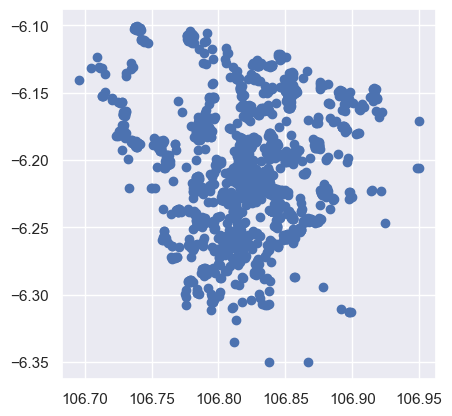

In [15]:
# Turn it into geodataframe using information of latitude and longitude
airbnb_jkt_csactive = gpd.GeoDataFrame(airbnb_jkt_csactive,crs=(4326), geometry=gpd.points_from_xy(airbnb_jkt_csactive.Longitude, airbnb_jkt_csactive.Latitude))
airbnb_jkt_csactive.plot()

In [16]:
airbnb_jkt_csactive.to_file("Airbnb_Jkt_Active.shp")

In [17]:
airbnb_bdg_csactive.to_file("Airbnb_Bdg_Active.shp")

## Reading in Spatial Data (Bandung and Jakarta)

In [18]:
# Read in Bandung spatial data (json file from Bandung open data)
bdg = gpd.read_file(os.path.join('Bandung OSM.shp'))
bdg

,id,@id,admin_leve,boundary,name,type,place,name_en,name_id,name_su,...,building_s,building_w,capacity,government,note,access_roo,addr_full,short_name,@relations,geometry
0,relation/13290059,relation/13290059,7,administrative,Ledeng,boundary,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((107.60048 -6.84212, 107.60188 -6.841..."
1,relation/13290060,relation/13290060,7,administrative,Isola,boundary,village,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((107.59757 -6.83688, 107.59775 -6.836..."
2,relation/13290061,relation/13290061,7,administrative,Cirangrang,boundary,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((107.58644 -6.95047, 107.58681 -6.950..."
3,relation/13290066,relation/13290066,7,administrative,Binong,boundary,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((107.64318 -6.93182, 107.64309 -6.932..."
4,relation/13290067,relation/13290067,7,administrative,Gumuruh,boundary,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((107.63661 -6.92798, 107.63741 -6.928..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,relation/13290222,relation/13290222,7,administrative,Caringin,boundary,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((107.56763 -6.93840, 107.56762 -6.938..."
147,relation/13290223,relation/13290223,7,administrative,Cigondewah Rahayu,boundary,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((107.56699 -6.95358, 107.56641 -6.953..."
148,relation/13290224,relation/13290224,7,administrative,Cigondewah Kidul,boundary,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((107.56076 -6.94896, 107.56040 -6.948..."
149,relation/13290225,relation/13290225,7,administrative,Cigondewah Kaler,boundary,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((107.55894 -6.93065, 107.55914 -6.930..."


In [19]:
bdg.columns

Index(['id', '@id', 'admin_leve', 'boundary', 'name', 'type', 'place',
       'name_en', 'name_id', 'name_su', 'name_su-La', 'wikidata', 'wikipedia',
       'population', 'populati_1', 'building', 'office', 'building_l',
       'building_r', 'building_s', 'building_w', 'capacity', 'government',
       'note', 'access_roo', 'addr_full', 'short_name', '@relations',
       'geometry'],
      dtype='object')

In [20]:
bdg = bdg[['name','geometry']]

In [21]:
# Read in Jakarta Spatial data
jkt = gpd.read_file(os.path.join('Jakarta OSM.shp'))
jkt

,id,@id,admin_leve,boundary,is_in_muni,is_in_prov,is_in_town,name,postal_cod,type,...,addr_hou_1,phone,wheelchair,government,generator,opening_ho,amenity,ref,@relations,geometry
0,relation/5802121,relation/5802121,7,administrative,Pademangan,DKI Jakarta,Jakarta Utara,Ancol,14430,boundary,...,None,None,None,None,None,None,None,None,None,"POLYGON ((106.82334 -6.11568, 106.82760 -6.116..."
1,relation/5802122,relation/5802122,7,administrative,Tambora,DKI Jakarta,Jakarta Barat,Pekojan,None,boundary,...,None,None,None,None,None,None,None,None,None,"POLYGON ((106.80427 -6.13240, 106.80582 -6.132..."
2,relation/5802123,relation/5802123,7,administrative,Cilincing,DKI Jakarta,Jakarta Utara,Marunda,14150,boundary,...,None,None,None,None,None,None,None,None,None,"POLYGON ((106.95896 -6.13234, 106.95897 -6.132..."
3,relation/5802124,relation/5802124,7,administrative,Pulo Gadung,DKI Jakarta,Jakarta Timur,Kayu Putih,None,boundary,...,None,None,None,None,None,None,None,None,None,"POLYGON ((106.87588 -6.17886, 106.87592 -6.178..."
4,relation/5802125,relation/5802125,7,administrative,Koja,DKI Jakarta,Jakarta Utara,Lagoa,14270,boundary,...,None,None,None,None,None,None,None,None,None,"POLYGON ((106.90305 -6.11204, 106.90598 -6.112..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,relation/7198542,relation/7198542,7,administrative,Tebet,DKI Jakarta,Jakarta Selatan,Menteng Dalam,None,boundary,...,None,None,None,None,None,None,None,None,None,"POLYGON ((106.84733 -6.22898, 106.84715 -6.229..."
258,relation/7210655,relation/7210655,7,administrative,Tebet,DKI Jakarta,Jakarta Selatan,Bukit Duri,None,boundary,...,None,None,None,None,None,None,None,None,None,"POLYGON ((106.85894 -6.21635, 106.85915 -6.216..."
259,relation/7212530,relation/7212530,7,administrative,Menteng,DKI Jakarta,Jakarta Pusat,Menteng,10310,boundary,...,None,None,None,None,None,None,None,None,None,"POLYGON ((106.84514 -6.20346, 106.84597 -6.204..."
260,relation/7212612,relation/7212612,7,administrative,Menteng,DKI Jakarta,Jakarta Pusat,Pegangsaan,10320,boundary,...,None,None,None,None,None,None,None,None,None,"POLYGON ((106.84315 -6.20085, 106.84218 -6.199..."


In [22]:
jkt = jkt[['name','geometry']]

<Axes: >

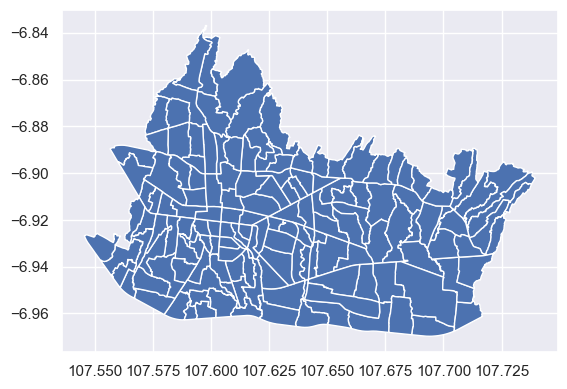

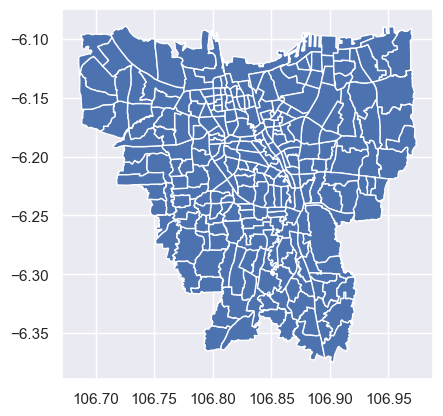

In [23]:
bdg.plot()
jkt.plot() # CRS for Jakarta needs adjusting

In [24]:
bdg

,name,geometry
0,Ledeng,"POLYGON ((107.60048 -6.84212, 107.60188 -6.841..."
1,Isola,"POLYGON ((107.59757 -6.83688, 107.59775 -6.836..."
2,Cirangrang,"POLYGON ((107.58644 -6.95047, 107.58681 -6.950..."
3,Binong,"POLYGON ((107.64318 -6.93182, 107.64309 -6.932..."
4,Gumuruh,"POLYGON ((107.63661 -6.92798, 107.63741 -6.928..."
...,...,...
146,Caringin,"POLYGON ((107.56763 -6.93840, 107.56762 -6.938..."
147,Cigondewah Rahayu,"POLYGON ((107.56699 -6.95358, 107.56641 -6.953..."
148,Cigondewah Kidul,"POLYGON ((107.56076 -6.94896, 107.56040 -6.948..."
149,Cigondewah Kaler,"POLYGON ((107.55894 -6.93065, 107.55914 -6.930..."


<Axes: >

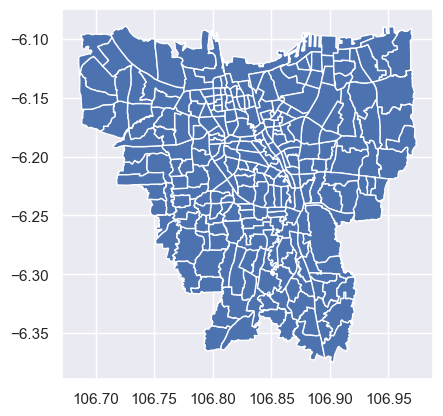

In [25]:
jkt = jkt.to_crs('epsg:4326')
jkt.plot()

In [26]:
bdg.columns

Index(['name', 'geometry'], dtype='object')

## Exploratory Data Analysis of Airbnb in Bandung and Jakarta (Cross Sectional Data)

In [27]:
coord_jkt = airbnb_jkt_csactive.loc[:,['Longitude','Latitude']]
coord_bdg = airbnb_bdg_csactive.loc[:,['Longitude','Latitude']]

In [28]:
coord_jkt.describe()

,Longitude,Latitude
count,2770.000000,2770.000000
mean,106.819548,-6.203797
std,0.036244,0.043908
min,106.695580,-6.350150
25%,106.792330,-6.227837
50%,106.818675,-6.205875
75%,106.842000,-6.178118
max,106.950230,-6.100380


In [29]:
coord_bdg.describe()

,Longitude,Latitude
count,919.000000,919.000000
mean,107.608824,-6.893896
std,0.018500,0.021533
min,107.560920,-6.963039
25%,107.603505,-6.910085
50%,107.606000,-6.889000
75%,107.615420,-6.878240
max,107.687931,-6.846140


### Heatmap of cross-sectional Airbnb Data in Bandung and Jakarta

In [30]:
import folium
from folium.plugins import HeatMap
map_folium = folium.Map([-6.203799,106.820737],zoom_start=11.4)
HeatMap(airbnb_jkt_csactive[['Latitude','Longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
folium.TileLayer('cartodbpositron').add_to(map_folium)
display(map_folium)
map_folium.save("jkt.html")

In [31]:
import folium
from folium.plugins import HeatMap
map_folium = folium.Map([-6.897040,107.609888],zoom_start=11.4)
HeatMap(airbnb_bdg_csactive[['Latitude','Longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
folium.TileLayer('cartodbpositron').add_to(map_folium)
display(map_folium)
map_folium.save("bdg.html")

In [32]:
# Let's merge the cross-section data together for analysis purpose
airbnb_bdg_csactive['city']='Bandung'
airbnb_jkt_csactive['city']='Jakarta'
# merge together
listings_cs = pd.concat([airbnb_bdg_csactive, airbnb_jkt_csactive]).reset_index(drop = True)

In [33]:
# Check the structure of the data after it's loaded.
nrow = listings_cs.shape[0]
ncol = listings_cs.shape[1]
print('The number of rows and columns: {} x {} in Airbnb dataset'.format(nrow, ncol))
listings_cs.head(1)

The number of rows and columns: 3689 x 72 in Airbnb dataset


,Property ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,State,City,Zipcode,...,HomeAway Location Type,Airbnb Property Plus,Airbnb Home Collection,License,Airbnb Property ID,Airbnb Host ID,HomeAway Property ID,HomeAway Property Manager ID,geometry,city
0,ab-181481,A place amongst green pines at Bandung Cipaku ...,House,Entire home/apt,2011-07-24,2020-07-19,Indonesia,West Java,Bandung,NaN,...,NaN,NaN,NaN,NaN,181481.0,869350.0,NaN,NaN,POINT (107.59634 -6.86293),Bandung


In [34]:
# only keep the following features in the dataset
cols =['Property ID', 'Listing Title', 'Property Type', 'Listing Type',
       'Created Date', 'Last Scraped Date', 'Country', 'State', 'City',
       'Currency Native', 'Average Daily Rate (USD)',
       'Average Daily Rate (Native)', 'Annual Revenue LTM (USD)',
       'Annual Revenue LTM (Native)', 'Occupancy Rate LTM',
       'Number of Bookings LTM', 'Number of Reviews', 'Bedrooms', 'Bathrooms',
       'Max Guests', 'Calendar Last Updated', 'Response Rate',
       'Airbnb Response Time (Text)', 'Airbnb Superhost',
       'HomeAway Premier Partner', 'Cancellation Policy',
       'Security Deposit (USD)', 'Security Deposit (Native)',
       'Cleaning Fee (USD)', 'Cleaning Fee (Native)', 'Extra People Fee (USD)',
       'Extra People Fee (Native)', 'Published Nightly Rate (USD)',
       'Published Monthly Rate (USD)', 'Published Weekly Rate (USD)', 'Minimum Stay',
       'Count Reservation Days LTM', 'Count Available Days LTM',
       'Count Blocked Days LTM', 'Number of Photos', 'Instantbook Enabled', 'Latitude',
       'Longitude', 'Exact Location', 'Overall Rating', 'Amenities',
       'Airbnb Property ID', 'Airbnb Host ID']
cleaned_list = listings_cs[cols]

cleaned_list.head(2)

,Property ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,State,City,Currency Native,...,Count Blocked Days LTM,Number of Photos,Instantbook Enabled,Latitude,Longitude,Exact Location,Overall Rating,Amenities,Airbnb Property ID,Airbnb Host ID
0,ab-181481,A place amongst green pines at Bandung Cipaku ...,House,Entire home/apt,2011-07-24,2020-07-19,Indonesia,West Java,Bandung,USD,...,8.0,83.0,True,-6.86293,107.59634,False,98.0,"[""wireless_internet"", ""kitchen"", ""free_parking...",181481.0,869350.0
1,ab-736264,Lamping GuestHouse Bandung - all 5 room for 10...,House,Entire home/apt,2012-10-11,2020-07-19,Indonesia,West Java,Bandung,IDR,...,43.0,29.0,True,-6.88629,107.60188,False,99.0,"[""wireless_internet"", ""kitchen"", ""free_parking...",736264.0,3484918.0


HomeAway Premier Partner       0.976959
Security Deposit (Native)      0.789374
Security Deposit (USD)         0.786392
State                          0.750881
Extra People Fee (Native)      0.673895
Extra People Fee (USD)         0.665492
Cleaning Fee (Native)          0.583356
Cleaning Fee (USD)             0.474654
Average Daily Rate (Native)    0.200325
Occupancy Rate LTM             0.200054
dtype: float64

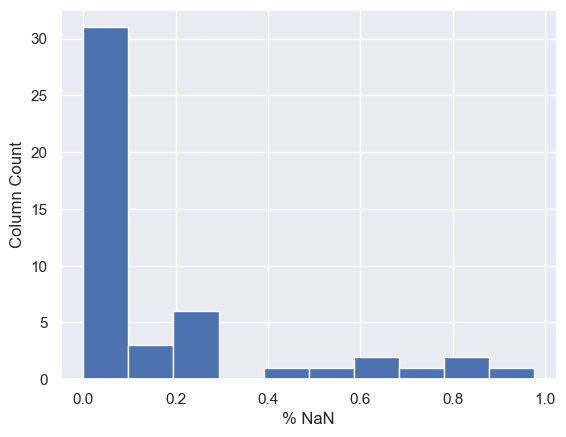

In [35]:
nan_cols = (cleaned_list.isnull().sum()/cleaned_list.shape[0]).sort_values(ascending = False)
ax = nan_cols.hist()  
ax.set_xlabel("% NaN")
ax.set_ylabel("Column Count")
nan_cols.head(n=10)

In [36]:
# drop high-NaN columns
cleaned_list = cleaned_list.drop(labels = ['Security Deposit (Native)', 'Security Deposit (USD)', 'HomeAway Premier Partner', 'Cleaning Fee (Native)','Cleaning Fee (USD)', \
                                           'Extra People Fee (Native)', 'Extra People Fee (USD)'], axis = 1)

### Spatial Join the Cross-Sectional Airbnb data
(1) Aggregate and count the number of Airbnb in each kelurahan \
(2) Count the sum of revenue, booking, etc. in each Kelurahan \

Let's count the number of Airbnb first

### JAKARTA

<Axes: >

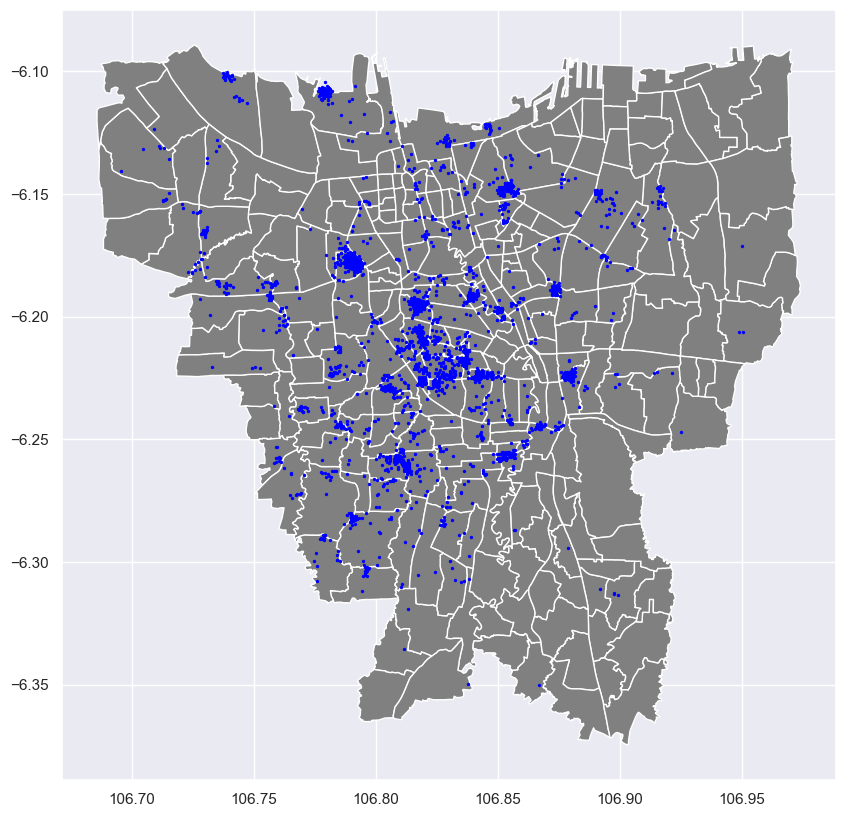

In [37]:
# Let's plot the Airbnb data in Jakarta
fig, ax = plt.subplots(figsize=(12,10))
jkt.plot(color="gray", ax= ax);
airbnb_jkt_csactive.plot(ax=ax, color='blue', markersize=2)

In [38]:
# Perform Spatial Join to join both spatial data
sjoined_jkt_listings = gpd.sjoin(airbnb_jkt_csactive, jkt, op="within")
sjoined_jkt_listings

,Property ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,State,City,Zipcode,...,Airbnb Home Collection,License,Airbnb Property ID,Airbnb Host ID,HomeAway Property ID,HomeAway Property Manager ID,geometry,city,index_right,name
1,ab-25459661,CoHaus 3BR High Rise Apt Permata Hijau,Apartment,Entire home/apt,2018-06-09,2019-12-30,Indonesia,NaN,Jakarta,NaN,...,NaN,NaN,25459661.0,119699703.0,7148539,travelmob-810190w,POINT (106.78453 -6.22014),Jakarta,40,Grogol Utara
3,ab-25460098,Cosy home w/ pool & very fast wifi near Taman ...,Guesthouse,Entire home/apt,2018-06-09,2020-07-19,Indonesia,NaN,Jakarta,NaN,...,NaN,NaN,25460098.0,129070773.0,NaN,NaN,POINT (106.89748 -6.31306),Jakarta,218,Bambu Apus
8,ab-25463646,Casa Grande residence - Kota Kasablanka Mall T...,Apartment,Entire home/apt,2018-06-08,2019-04-05,Indonesia,NaN,Jakarta,NaN,...,NaN,NaN,25463646.0,68074817.0,NaN,NaN,POINT (106.84217 -6.22451),Jakarta,257,Menteng Dalam
16,ab-25474626,Gandaria Height Apt connecting Gandaria City ...,Apartment,Entire home/apt,2018-06-09,2019-10-17,Indonesia,NaN,Jakarta,NaN,...,NaN,NaN,25474626.0,58797156.0,NaN,NaN,POINT (106.78414 -6.24441),Jakarta,110,Kebayoran Lama Utara
20,ab-25491929,Chic Studio Apt at City,Apartment,Entire home/apt,2018-06-08,2020-07-19,Indonesia,NaN,Jakarta,NaN,...,NaN,NaN,25491929.0,192397526.0,NaN,NaN,POINT (106.86380 -6.24616),Jakarta,75,Cawang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19042,ha-4573675,Marriott Executive Apartments Mayflower,Corporate Apartment,Entire home/apt,NaN,2020-06-22,Indonesia,NaN,Jakarta,NaN,...,NaN,NaN,NaN,NaN,4573675,NaN,POINT (106.82220 -6.20815),Jakarta,212,Setiabudi
19047,ha-4574884,Morrissey Hotel Residences,Corporate Apartment,Entire home/apt,NaN,2020-06-23,Indonesia,NaN,Jakarta,NaN,...,NaN,NaN,NaN,NaN,4574884,NaN,POINT (106.82500 -6.18708),Jakarta,189,Gondangdia
19187,ha-4902014,Havenwood Senopati - Near Kidzania,Corporate Apartment,Entire home/apt,NaN,2020-06-22,Indonesia,NaN,Jakarta,NaN,...,NaN,NaN,NaN,NaN,4902014,NaN,POINT (106.81280 -6.23272),Jakarta,142,Selong
19198,ha-4908656,Fraser Place Setiabudi Jakarta,Corporate Apartment,Entire home/apt,NaN,2020-05-25,Indonesia,NaN,Jakarta,NaN,...,NaN,NaN,NaN,NaN,4908656,NaN,POINT (106.82940 -6.21527),Jakarta,125,Karet


In [39]:
sjoined_jkt_listings.columns

Index(['Property ID', 'Listing Title', 'Property Type', 'Listing Type',
       'Created Date', 'Last Scraped Date', 'Country', 'State', 'City',
       'Zipcode', 'Neighborhood', 'Metropolitan Statistical Area',
       'Currency Native', 'Average Daily Rate (USD)',
       'Average Daily Rate (Native)', 'Annual Revenue LTM (USD)',
       'Annual Revenue LTM (Native)', 'Occupancy Rate LTM',
       'Number of Bookings LTM', 'Number of Reviews', 'Bedrooms', 'Bathrooms',
       'Max Guests', 'Calendar Last Updated', 'Response Rate',
       'Airbnb Response Time (Text)', 'Airbnb Superhost',
       'HomeAway Premier Partner', 'Cancellation Policy',
       'Security Deposit (USD)', 'Security Deposit (Native)',
       'Cleaning Fee (USD)', 'Cleaning Fee (Native)', 'Extra People Fee (USD)',
       'Extra People Fee (Native)', 'Published Nightly Rate (USD)',
       'Published Monthly Rate (USD)', 'Published Weekly Rate (USD)',
       'Check-in Time', 'Checkout Time', 'Minimum Stay',
       'Count 

In [40]:
# Let's count the number of Airbnb
# Group the listings that has the same KELURAHAN code information
grouped = sjoined_jkt_listings.groupby("name").size()
df_jkt = grouped.to_frame().reset_index()
df_jkt.columns = ['KEL_NAME', 'listings_count']
df_jkt

,KEL_NAME,listings_count
0,Ancol,34
1,Angke,2
2,Bambu Apus,3
3,Bangka,67
4,Batu Ampar,2
...,...,...
162,Tegal Parang,1
163,Tomang,6
164,Ulujami,1
165,Utan Kayu Selatan,1


In [41]:
jkt.head()

,name,geometry
0,Ancol,"POLYGON ((106.82334 -6.11568, 106.82760 -6.116..."
1,Pekojan,"POLYGON ((106.80427 -6.13240, 106.80582 -6.132..."
2,Marunda,"POLYGON ((106.95896 -6.13234, 106.95897 -6.132..."
3,Kayu Putih,"POLYGON ((106.87588 -6.17886, 106.87592 -6.178..."
4,Lagoa,"POLYGON ((106.90305 -6.11204, 106.90598 -6.112..."


In [42]:
# Merge it back to Kelurahan data
airbnbcs_jkt = jkt.merge(df_jkt, left_on="name", right_on="KEL_NAME", how="outer")
# Change null values to zero
airbnbcs_jkt = airbnbcs_jkt.fillna(0)
airbnbcs_jkt

,name,geometry,KEL_NAME,listings_count
0,Ancol,"POLYGON ((106.82334 -6.11568, 106.82760 -6.116...",Ancol,34.0
1,Angke,"POLYGON ((106.80006 -6.14849, 106.79953 -6.148...",Angke,2.0
2,Bale Kambang,"POLYGON ((106.85578 -6.29277, 106.85578 -6.293...",0,0.0
3,Bali Mester,"POLYGON ((106.86690 -6.22562, 106.86673 -6.225...",0,0.0
4,Bambu Apus,"POLYGON ((106.91048 -6.30704, 106.90978 -6.307...",Bambu Apus,3.0
...,...,...,...,...
257,Utan Kayu Selatan,"POLYGON ((106.86326 -6.20100, 106.86300 -6.200...",Utan Kayu Selatan,1.0
258,Utan Kayu Utara,"POLYGON ((106.86424 -6.19860, 106.86416 -6.198...",0,0.0
259,Utan Panjang,"POLYGON ((106.85690 -6.16125, 106.85838 -6.162...",0,0.0
260,Warakas,"POLYGON ((106.88398 -6.12691, 106.88242 -6.126...",0,0.0


In [43]:
sjoined_jkt_listings.columns

Index(['Property ID', 'Listing Title', 'Property Type', 'Listing Type',
       'Created Date', 'Last Scraped Date', 'Country', 'State', 'City',
       'Zipcode', 'Neighborhood', 'Metropolitan Statistical Area',
       'Currency Native', 'Average Daily Rate (USD)',
       'Average Daily Rate (Native)', 'Annual Revenue LTM (USD)',
       'Annual Revenue LTM (Native)', 'Occupancy Rate LTM',
       'Number of Bookings LTM', 'Number of Reviews', 'Bedrooms', 'Bathrooms',
       'Max Guests', 'Calendar Last Updated', 'Response Rate',
       'Airbnb Response Time (Text)', 'Airbnb Superhost',
       'HomeAway Premier Partner', 'Cancellation Policy',
       'Security Deposit (USD)', 'Security Deposit (Native)',
       'Cleaning Fee (USD)', 'Cleaning Fee (Native)', 'Extra People Fee (USD)',
       'Extra People Fee (Native)', 'Published Nightly Rate (USD)',
       'Published Monthly Rate (USD)', 'Published Weekly Rate (USD)',
       'Check-in Time', 'Checkout Time', 'Minimum Stay',
       'Count 

Let's look at the other variables (especially booking and revenue total)

In [44]:
#Group the listings that has the same KELURAHAN code information
grouped = sjoined_jkt_listings.groupby("name").sum(numeric_only=True)
grouped

,Zipcode,Neighborhood,Metropolitan Statistical Area,Average Daily Rate (USD),Average Daily Rate (Native),Annual Revenue LTM (USD),Annual Revenue LTM (Native),Occupancy Rate LTM,Number of Bookings LTM,Number of Reviews,...,Airbnb Cleanliness Rating,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Airbnb Property Plus,Airbnb Home Collection,License,Airbnb Property ID,Airbnb Host ID,index_right
name,,,,,,,,,,,,,,,,,,,,,
Ancol,0.0,0.0,0.0,1232.87,12752183.07,99992.0,1.050859e+09,9.153,790.0,909.0,...,309.0,323.0,324.0,315.0,0.0,0.0,0.0,6.921823e+08,3.041283e+09,0
Angke,0.0,0.0,0.0,40.59,586216.00,2615.0,3.784500e+07,0.830,32.0,44.0,...,18.0,19.0,18.0,18.0,0.0,0.0,0.0,6.533008e+07,2.828890e+08,474
Bambu Apus,0.0,0.0,0.0,31.94,451313.00,2214.0,3.124000e+07,0.579,38.0,83.0,...,28.0,30.0,29.0,30.0,0.0,0.0,0.0,6.716269e+07,3.148269e+08,654
Bangka,0.0,0.0,0.0,3336.14,37998355.85,240147.0,2.846814e+09,26.851,1133.0,1182.0,...,615.0,653.0,659.0,631.0,0.0,0.0,0.0,1.511455e+09,5.928220e+09,4824
Batu Ampar,0.0,0.0,0.0,23.00,320000.00,225.0,3.100000e+06,0.582,3.0,28.0,...,20.0,20.0,18.0,20.0,0.0,0.0,0.0,2.016634e+07,1.034686e+08,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tegal Parang,0.0,0.0,0.0,24.38,363501.00,1414.0,2.108306e+07,0.537,16.0,15.0,...,10.0,10.0,9.0,9.0,0.0,0.0,0.0,3.418437e+07,1.312778e+08,174
Tomang,0.0,0.0,0.0,241.64,3289482.00,12867.0,1.802647e+08,1.397,78.0,63.0,...,56.0,58.0,56.0,58.0,0.0,0.0,0.0,1.387737e+08,6.473110e+08,696
Ulujami,0.0,0.0,0.0,18.22,258764.00,492.0,6.986629e+06,0.142,16.0,14.0,...,10.0,10.0,10.0,10.0,0.0,0.0,0.0,3.722758e+07,2.802848e+08,172


In [45]:
df_jkt = grouped.reset_index()
df_jkt

,name,Zipcode,Neighborhood,Metropolitan Statistical Area,Average Daily Rate (USD),Average Daily Rate (Native),Annual Revenue LTM (USD),Annual Revenue LTM (Native),Occupancy Rate LTM,Number of Bookings LTM,...,Airbnb Cleanliness Rating,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Airbnb Property Plus,Airbnb Home Collection,License,Airbnb Property ID,Airbnb Host ID,index_right
0,Ancol,0.0,0.0,0.0,1232.87,12752183.07,99992.0,1.050859e+09,9.153,790.0,...,309.0,323.0,324.0,315.0,0.0,0.0,0.0,6.921823e+08,3.041283e+09,0
1,Angke,0.0,0.0,0.0,40.59,586216.00,2615.0,3.784500e+07,0.830,32.0,...,18.0,19.0,18.0,18.0,0.0,0.0,0.0,6.533008e+07,2.828890e+08,474
2,Bambu Apus,0.0,0.0,0.0,31.94,451313.00,2214.0,3.124000e+07,0.579,38.0,...,28.0,30.0,29.0,30.0,0.0,0.0,0.0,6.716269e+07,3.148269e+08,654
3,Bangka,0.0,0.0,0.0,3336.14,37998355.85,240147.0,2.846814e+09,26.851,1133.0,...,615.0,653.0,659.0,631.0,0.0,0.0,0.0,1.511455e+09,5.928220e+09,4824
4,Batu Ampar,0.0,0.0,0.0,23.00,320000.00,225.0,3.100000e+06,0.582,3.0,...,20.0,20.0,18.0,20.0,0.0,0.0,0.0,2.016634e+07,1.034686e+08,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Tegal Parang,0.0,0.0,0.0,24.38,363501.00,1414.0,2.108306e+07,0.537,16.0,...,10.0,10.0,9.0,9.0,0.0,0.0,0.0,3.418437e+07,1.312778e+08,174
163,Tomang,0.0,0.0,0.0,241.64,3289482.00,12867.0,1.802647e+08,1.397,78.0,...,56.0,58.0,56.0,58.0,0.0,0.0,0.0,1.387737e+08,6.473110e+08,696
164,Ulujami,0.0,0.0,0.0,18.22,258764.00,492.0,6.986629e+06,0.142,16.0,...,10.0,10.0,10.0,10.0,0.0,0.0,0.0,3.722758e+07,2.802848e+08,172
165,Utan Kayu Selatan,0.0,0.0,0.0,0.00,0.00,0.0,0.000000e+00,0.000,0.0,...,8.0,7.0,8.0,7.0,0.0,0.0,0.0,7.567901e+06,1.914242e+07,53


In [46]:
# Merge it back to Kelurahan data
airbnbrev_jkt = jkt.merge(df_jkt, on="name", how="outer")
# Change null values to zero
airbnbrev_jkt = airbnbrev_jkt.fillna(0)


In [47]:
airbnbrev_jkt.columns

Index(['name', 'geometry', 'Zipcode', 'Neighborhood',
       'Metropolitan Statistical Area', 'Average Daily Rate (USD)',
       'Average Daily Rate (Native)', 'Annual Revenue LTM (USD)',
       'Annual Revenue LTM (Native)', 'Occupancy Rate LTM',
       'Number of Bookings LTM', 'Number of Reviews', 'Bedrooms', 'Bathrooms',
       'Max Guests', 'Response Rate', 'Security Deposit (USD)',
       'Security Deposit (Native)', 'Cleaning Fee (USD)',
       'Cleaning Fee (Native)', 'Extra People Fee (USD)',
       'Extra People Fee (Native)', 'Published Nightly Rate (USD)',
       'Published Monthly Rate (USD)', 'Published Weekly Rate (USD)',
       'Minimum Stay', 'Count Reservation Days LTM',
       'Count Available Days LTM', 'Count Blocked Days LTM',
       'Number of Photos', 'Instantbook Enabled', 'Latitude', 'Longitude',
       'Overall Rating', 'Airbnb Communication Rating',
       'Airbnb Accuracy Rating', 'Airbnb Cleanliness Rating',
       'Airbnb Checkin Rating', 'Airbnb Location

<Axes: >

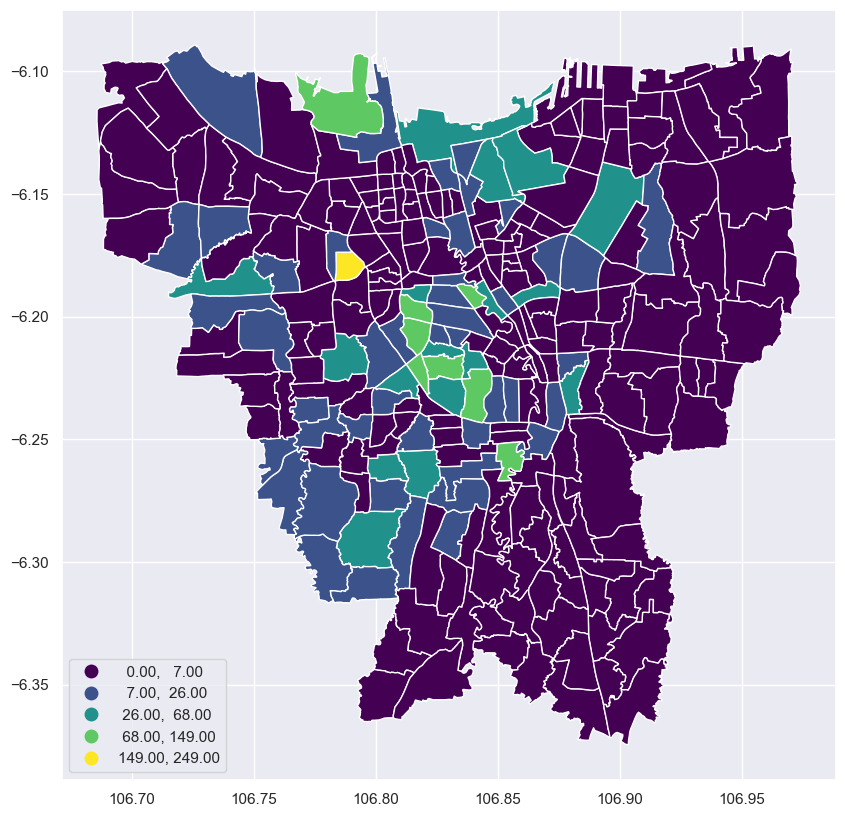

In [48]:
# Let's plot our data - in spatial join you need to make sure the accuracy of your operation is correct
fig, ax = plt.subplots(figsize=(12,10))
airbnbcs_jkt.plot(ax=ax, column="listings_count", scheme='fisherjenks', cmap="viridis", legend= True, legend_kwds={'loc': 'lower left'})
#airbnb_jkt_csactive.plot(ax=ax, color='black', markersize=2);

<Axes: >

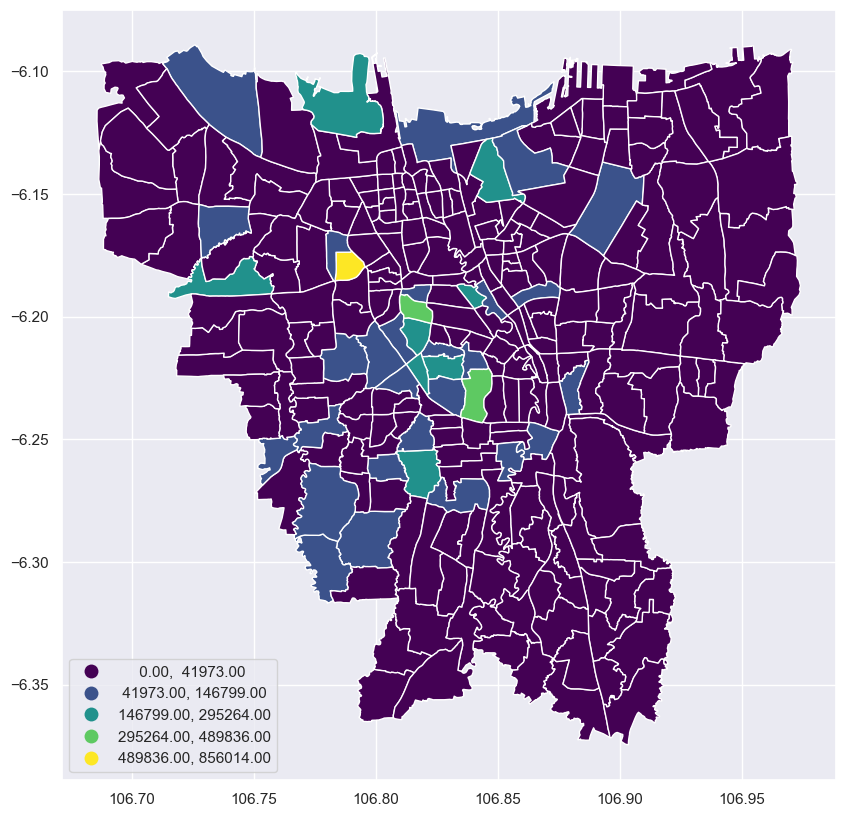

In [49]:
# Let's plot our data - in spatial join you need to make sure the accuracy of your operation is correct
fig, ax = plt.subplots(figsize=(12,10))
airbnbrev_jkt.plot(ax=ax, column="Annual Revenue LTM (USD)", scheme='fisherjenks', cmap="viridis", legend= True, legend_kwds={'loc': 'lower left'})
#airbnb_jkt_csactive.plot(ax=ax, color='black', markersize=2);

<Axes: >

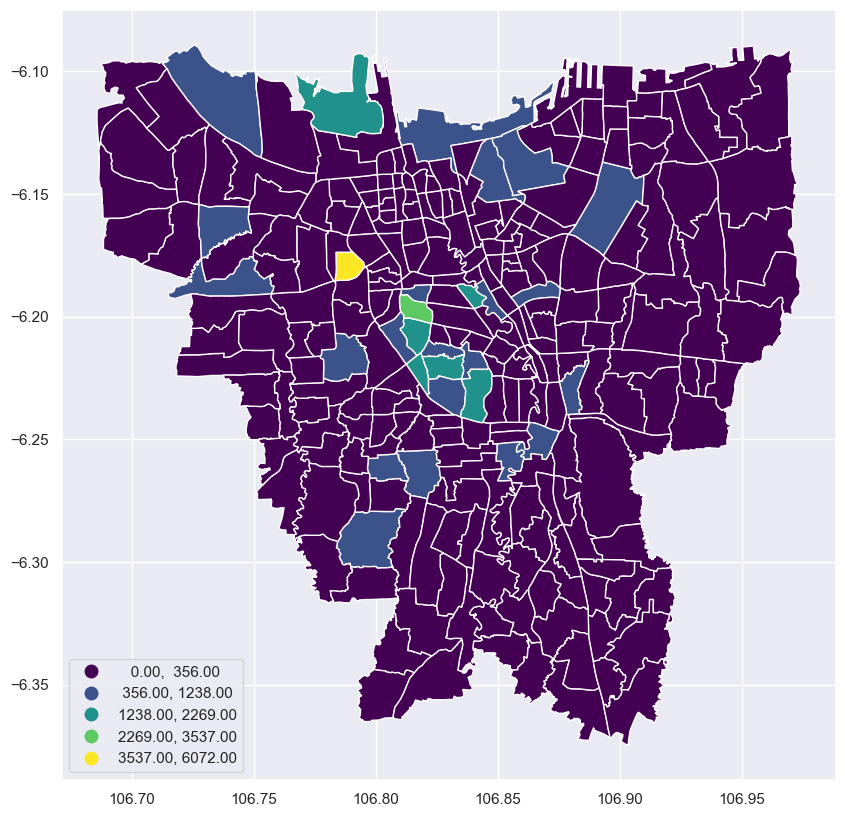

In [50]:
# Let's plot our data - in spatial join you need to make sure the accuracy of your operation is correct
fig, ax = plt.subplots(figsize=(12,10))
airbnbrev_jkt.plot(ax=ax, column="Number of Bookings LTM", scheme='fisherjenks', cmap="viridis", legend= True, legend_kwds={'loc': 'lower left'})
#airbnb_jkt_csactive.plot(ax=ax, color='black', markersize=2);

<Axes: >

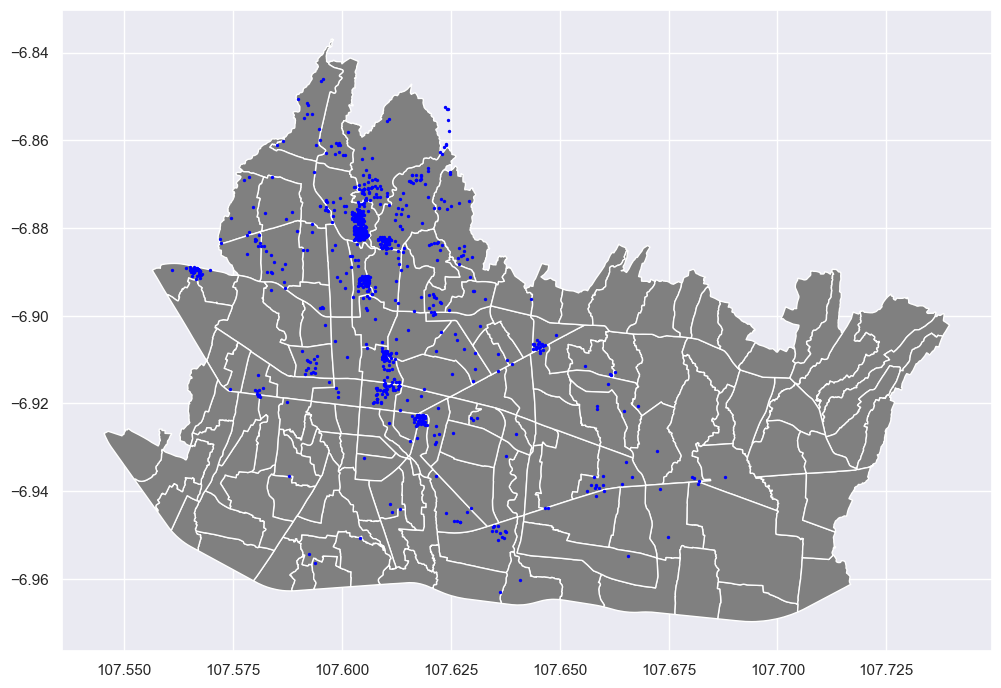

In [51]:
# Let's plot the Airbnb data in Bandung
fig, ax = plt.subplots(figsize=(12,10))
bdg.plot(color="gray", ax= ax);
airbnb_bdg_csactive.plot(ax=ax, color='blue', markersize=2)

### BANDUNG

In [52]:
# Perform Spatial Join
sjoined_bdg_listings = gpd.sjoin(airbnb_bdg_csactive, bdg, op="within")
sjoined_bdg_listings.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 911 entries, 0 to 4698
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Property ID                    911 non-null    object  
 1   Listing Title                  911 non-null    object  
 2   Property Type                  911 non-null    object  
 3   Listing Type                   911 non-null    object  
 4   Created Date                   911 non-null    object  
 5   Last Scraped Date              911 non-null    object  
 6   Country                        911 non-null    object  
 7   State                          911 non-null    object  
 8   City                           911 non-null    object  
 9   Zipcode                        0 non-null      float64 
 10  Neighborhood                   0 non-null      float64 
 11  Metropolitan Statistical Area  0 non-null      float64 
 12  Currency Native                9

In [53]:
sjoined_bdg_listings["Bedrooms"]=sjoined_bdg_listings["Bedrooms"].replace(0,1)
sjoined_bdg_listings['PPB'] = sjoined_bdg_listings['Average Daily Rate (USD)']/sjoined_bdg_listings['Bedrooms']

In [54]:
#Group the listings that has the same KELURAHAN code information
grouped = sjoined_bdg_listings.groupby("name").size()
df_bdg = grouped.to_frame().reset_index()
df_bdg.columns = ['nama_kelurahan', 'listings_count']
df_bdg

,nama_kelurahan,listings_count
0,Antapani Kidul,2
1,Antapani Kulon,3
2,Antapani Tengah,2
3,Antapani Wetan,1
4,Arjuna,14
...,...,...
75,Sukarasa,4
76,Sukawarna,8
77,Tamansari,8
78,Turangga,1


In [55]:
# Merge it back to Kelurahan data
airbnbcs_bdg = bdg.merge(df_bdg, left_on="name", right_on='nama_kelurahan', how="outer")
#airbnbcs_bdg = bdg.merge(df_bdg_price, left_on="nama_kelurahan", right_on='nama_kelurahan', how="outer")
# Change null values to zero
airbnbcs_bdg = airbnbcs_bdg.fillna(0)
airbnbcs_bdg

,name,geometry,nama_kelurahan,listings_count
0,Ancol,"POLYGON ((107.61490 -6.93250, 107.61526 -6.932...",0,0.0
1,Antapani Kidul,"POLYGON ((107.66681 -6.93244, 107.66673 -6.932...",Antapani Kidul,2.0
2,Antapani Kulon,"POLYGON ((107.66227 -6.91417, 107.66152 -6.913...",Antapani Kulon,3.0
3,Antapani Tengah,"POLYGON ((107.66799 -6.91601, 107.66808 -6.916...",Antapani Tengah,2.0
4,Antapani Wetan,"POLYGON ((107.66694 -6.90416, 107.66692 -6.904...",Antapani Wetan,1.0
...,...,...,...,...
146,Sukawarna,"POLYGON ((107.58107 -6.89221, 107.58070 -6.892...",Sukawarna,8.0
147,Tamansari,"POLYGON ((107.60445 -6.90718, 107.60443 -6.906...",Tamansari,8.0
148,Turangga,"POLYGON ((107.63600 -6.94723, 107.63339 -6.948...",Turangga,1.0
149,Warungmuncang,"POLYGON ((107.57625 -6.91746, 107.57672 -6.917...",Warungmuncang,3.0


In [56]:
#Group the listings that has the same KELURAHAN code information based on TOTAL
grouped = sjoined_bdg_listings.groupby("name").sum(numeric_only=True)
df_bdg = grouped.reset_index()
df_bdg

,name,Zipcode,Neighborhood,Metropolitan Statistical Area,Average Daily Rate (USD),Average Daily Rate (Native),Annual Revenue LTM (USD),Annual Revenue LTM (Native),Occupancy Rate LTM,Number of Bookings LTM,...,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Airbnb Property Plus,Airbnb Home Collection,License,Airbnb Property ID,Airbnb Host ID,index_right,PPB
0,Antapani Kidul,0.0,0.0,0.0,110.23,1581900.00,5258.0,75421700.0,0.533,52.0,...,20.0,20.0,20.0,0.0,0.0,0.0,40547106.0,2.803820e+08,40,27.557500
1,Antapani Kulon,0.0,0.0,0.0,113.78,1643736.00,3341.0,48106000.0,0.484,83.0,...,29.0,28.0,29.0,0.0,0.0,0.0,57892065.0,3.512461e+08,54,30.772000
2,Antapani Tengah,0.0,0.0,0.0,84.42,1200913.00,8776.0,124560000.0,1.048,79.0,...,20.0,19.0,20.0,0.0,0.0,0.0,71233114.0,3.979716e+08,38,34.316667
3,Antapani Wetan,0.0,0.0,0.0,39.65,578207.00,6145.0,89622040.0,0.480,66.0,...,10.0,9.0,9.0,0.0,0.0,0.0,22758959.0,1.681001e+08,17,7.930000
4,Arjuna,0.0,0.0,0.0,628.51,8069720.38,45228.0,638455180.0,5.295,351.0,...,137.0,132.0,133.0,0.0,0.0,0.0,428982319.0,2.169778e+09,1666,359.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Sukarasa,0.0,0.0,0.0,337.34,4774580.00,34138.0,484594940.0,0.958,163.0,...,40.0,38.0,38.0,0.0,0.0,0.0,74582187.0,3.384723e+08,448,94.085000
76,Sukawarna,0.0,0.0,0.0,167.50,2355230.00,5351.0,75743723.0,1.494,96.0,...,78.0,77.0,74.0,0.0,0.0,0.0,185915746.0,1.002053e+09,912,89.705000
77,Tamansari,0.0,0.0,0.0,259.73,2040908.00,7597.0,80086046.0,2.177,50.0,...,75.0,74.0,72.0,0.0,0.0,0.0,132625158.0,6.169191e+08,264,175.365000
78,Turangga,0.0,0.0,0.0,15.07,15.07,211.0,211.0,0.152,4.0,...,10.0,10.0,10.0,0.0,0.0,0.0,16581793.0,1.065764e+08,84,5.023333


In [57]:
# Merge it back to Kelurahan data
airbnbrev_bdg = bdg.merge(df_bdg, left_on="name", right_on='name', how="outer")
#airbnbcs_bdg = bdg.merge(df_bdg_price, left_on="nama_kelurahan", right_on='nama_kelurahan', how="outer")
# Change null values to zero
airbnbrev_bdg = airbnbrev_bdg.fillna(0)
airbnbrev_bdg

,name,geometry,Zipcode,Neighborhood,Metropolitan Statistical Area,Average Daily Rate (USD),Average Daily Rate (Native),Annual Revenue LTM (USD),Annual Revenue LTM (Native),Occupancy Rate LTM,...,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Airbnb Property Plus,Airbnb Home Collection,License,Airbnb Property ID,Airbnb Host ID,index_right,PPB
0,Ancol,"POLYGON ((107.61490 -6.93250, 107.61526 -6.932...",0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000
1,Antapani Kidul,"POLYGON ((107.66681 -6.93244, 107.66673 -6.932...",0.0,0.0,0.0,110.23,1581900.00,5258.0,75421700.0,0.533,...,20.0,20.0,20.0,0.0,0.0,0.0,40547106.0,2.803820e+08,40.0,27.557500
2,Antapani Kulon,"POLYGON ((107.66227 -6.91417, 107.66152 -6.913...",0.0,0.0,0.0,113.78,1643736.00,3341.0,48106000.0,0.484,...,29.0,28.0,29.0,0.0,0.0,0.0,57892065.0,3.512461e+08,54.0,30.772000
3,Antapani Tengah,"POLYGON ((107.66799 -6.91601, 107.66808 -6.916...",0.0,0.0,0.0,84.42,1200913.00,8776.0,124560000.0,1.048,...,20.0,19.0,20.0,0.0,0.0,0.0,71233114.0,3.979716e+08,38.0,34.316667
4,Antapani Wetan,"POLYGON ((107.66694 -6.90416, 107.66692 -6.904...",0.0,0.0,0.0,39.65,578207.00,6145.0,89622040.0,0.480,...,10.0,9.0,9.0,0.0,0.0,0.0,22758959.0,1.681001e+08,17.0,7.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Sukawarna,"POLYGON ((107.58107 -6.89221, 107.58070 -6.892...",0.0,0.0,0.0,167.50,2355230.00,5351.0,75743723.0,1.494,...,78.0,77.0,74.0,0.0,0.0,0.0,185915746.0,1.002053e+09,912.0,89.705000
147,Tamansari,"POLYGON ((107.60445 -6.90718, 107.60443 -6.906...",0.0,0.0,0.0,259.73,2040908.00,7597.0,80086046.0,2.177,...,75.0,74.0,72.0,0.0,0.0,0.0,132625158.0,6.169191e+08,264.0,175.365000
148,Turangga,"POLYGON ((107.63600 -6.94723, 107.63339 -6.948...",0.0,0.0,0.0,15.07,15.07,211.0,211.0,0.152,...,10.0,10.0,10.0,0.0,0.0,0.0,16581793.0,1.065764e+08,84.0,5.023333
149,Warungmuncang,"POLYGON ((107.57625 -6.91746, 107.57672 -6.917...",0.0,0.0,0.0,41.94,605876.00,2200.0,31985714.0,0.720,...,29.0,28.0,30.0,0.0,0.0,0.0,52728726.0,9.966591e+07,432.0,41.940000


In [58]:
# Let's check the mean price
#Group the listings that has the same KELURAHAN code information
grouped = sjoined_bdg_listings['PPB'].groupby(sjoined_bdg_listings["name"]).mean()
df_bdg_price = grouped.to_frame().reset_index()
df_bdg_price.columns = ['nama_kelurahan', 'Mean Price']
df_bdg_price

,nama_kelurahan,Mean Price
0,Antapani Kidul,13.778750
1,Antapani Kulon,15.386000
2,Antapani Tengah,17.158333
3,Antapani Wetan,7.930000
4,Arjuna,27.634615
...,...,...
75,Sukarasa,23.521250
76,Sukawarna,14.950833
77,Tamansari,29.227500
78,Turangga,5.023333


In [59]:
# Merge it back to Kelurahan data
airbnbcs_bdg1 = bdg.merge(df_bdg, left_on="name", right_on='name', how="outer")
#airbnbcs_bdg = bdg.merge(df_bdg_price, left_on="nama_kelurahan", right_on='nama_kelurahan', how="outer")
# Change null values to zero
airbnbcs_bdg1 = airbnbcs_bdg1.fillna(0)
airbnbcs_bdg1

,name,geometry,Zipcode,Neighborhood,Metropolitan Statistical Area,Average Daily Rate (USD),Average Daily Rate (Native),Annual Revenue LTM (USD),Annual Revenue LTM (Native),Occupancy Rate LTM,...,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Airbnb Property Plus,Airbnb Home Collection,License,Airbnb Property ID,Airbnb Host ID,index_right,PPB
0,Ancol,"POLYGON ((107.61490 -6.93250, 107.61526 -6.932...",0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000
1,Antapani Kidul,"POLYGON ((107.66681 -6.93244, 107.66673 -6.932...",0.0,0.0,0.0,110.23,1581900.00,5258.0,75421700.0,0.533,...,20.0,20.0,20.0,0.0,0.0,0.0,40547106.0,2.803820e+08,40.0,27.557500
2,Antapani Kulon,"POLYGON ((107.66227 -6.91417, 107.66152 -6.913...",0.0,0.0,0.0,113.78,1643736.00,3341.0,48106000.0,0.484,...,29.0,28.0,29.0,0.0,0.0,0.0,57892065.0,3.512461e+08,54.0,30.772000
3,Antapani Tengah,"POLYGON ((107.66799 -6.91601, 107.66808 -6.916...",0.0,0.0,0.0,84.42,1200913.00,8776.0,124560000.0,1.048,...,20.0,19.0,20.0,0.0,0.0,0.0,71233114.0,3.979716e+08,38.0,34.316667
4,Antapani Wetan,"POLYGON ((107.66694 -6.90416, 107.66692 -6.904...",0.0,0.0,0.0,39.65,578207.00,6145.0,89622040.0,0.480,...,10.0,9.0,9.0,0.0,0.0,0.0,22758959.0,1.681001e+08,17.0,7.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Sukawarna,"POLYGON ((107.58107 -6.89221, 107.58070 -6.892...",0.0,0.0,0.0,167.50,2355230.00,5351.0,75743723.0,1.494,...,78.0,77.0,74.0,0.0,0.0,0.0,185915746.0,1.002053e+09,912.0,89.705000
147,Tamansari,"POLYGON ((107.60445 -6.90718, 107.60443 -6.906...",0.0,0.0,0.0,259.73,2040908.00,7597.0,80086046.0,2.177,...,75.0,74.0,72.0,0.0,0.0,0.0,132625158.0,6.169191e+08,264.0,175.365000
148,Turangga,"POLYGON ((107.63600 -6.94723, 107.63339 -6.948...",0.0,0.0,0.0,15.07,15.07,211.0,211.0,0.152,...,10.0,10.0,10.0,0.0,0.0,0.0,16581793.0,1.065764e+08,84.0,5.023333
149,Warungmuncang,"POLYGON ((107.57625 -6.91746, 107.57672 -6.917...",0.0,0.0,0.0,41.94,605876.00,2200.0,31985714.0,0.720,...,29.0,28.0,30.0,0.0,0.0,0.0,52728726.0,9.966591e+07,432.0,41.940000


In [60]:
airbnbcs_bdg1

,name,geometry,Zipcode,Neighborhood,Metropolitan Statistical Area,Average Daily Rate (USD),Average Daily Rate (Native),Annual Revenue LTM (USD),Annual Revenue LTM (Native),Occupancy Rate LTM,...,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Airbnb Property Plus,Airbnb Home Collection,License,Airbnb Property ID,Airbnb Host ID,index_right,PPB
0,Ancol,"POLYGON ((107.61490 -6.93250, 107.61526 -6.932...",0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000
1,Antapani Kidul,"POLYGON ((107.66681 -6.93244, 107.66673 -6.932...",0.0,0.0,0.0,110.23,1581900.00,5258.0,75421700.0,0.533,...,20.0,20.0,20.0,0.0,0.0,0.0,40547106.0,2.803820e+08,40.0,27.557500
2,Antapani Kulon,"POLYGON ((107.66227 -6.91417, 107.66152 -6.913...",0.0,0.0,0.0,113.78,1643736.00,3341.0,48106000.0,0.484,...,29.0,28.0,29.0,0.0,0.0,0.0,57892065.0,3.512461e+08,54.0,30.772000
3,Antapani Tengah,"POLYGON ((107.66799 -6.91601, 107.66808 -6.916...",0.0,0.0,0.0,84.42,1200913.00,8776.0,124560000.0,1.048,...,20.0,19.0,20.0,0.0,0.0,0.0,71233114.0,3.979716e+08,38.0,34.316667
4,Antapani Wetan,"POLYGON ((107.66694 -6.90416, 107.66692 -6.904...",0.0,0.0,0.0,39.65,578207.00,6145.0,89622040.0,0.480,...,10.0,9.0,9.0,0.0,0.0,0.0,22758959.0,1.681001e+08,17.0,7.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Sukawarna,"POLYGON ((107.58107 -6.89221, 107.58070 -6.892...",0.0,0.0,0.0,167.50,2355230.00,5351.0,75743723.0,1.494,...,78.0,77.0,74.0,0.0,0.0,0.0,185915746.0,1.002053e+09,912.0,89.705000
147,Tamansari,"POLYGON ((107.60445 -6.90718, 107.60443 -6.906...",0.0,0.0,0.0,259.73,2040908.00,7597.0,80086046.0,2.177,...,75.0,74.0,72.0,0.0,0.0,0.0,132625158.0,6.169191e+08,264.0,175.365000
148,Turangga,"POLYGON ((107.63600 -6.94723, 107.63339 -6.948...",0.0,0.0,0.0,15.07,15.07,211.0,211.0,0.152,...,10.0,10.0,10.0,0.0,0.0,0.0,16581793.0,1.065764e+08,84.0,5.023333
149,Warungmuncang,"POLYGON ((107.57625 -6.91746, 107.57672 -6.917...",0.0,0.0,0.0,41.94,605876.00,2200.0,31985714.0,0.720,...,29.0,28.0,30.0,0.0,0.0,0.0,52728726.0,9.966591e+07,432.0,41.940000


In [61]:
# Merge it back to Kelurahan data
airbnbcs_bdg = airbnbcs_bdg.merge(df_bdg_price, left_on="name", right_on='nama_kelurahan', how="outer")
# Change null values to zero
airbnbcs_bdg = airbnbcs_bdg.fillna(0)
airbnbcs_bdg

,name,geometry,nama_kelurahan_x,listings_count,nama_kelurahan_y,Mean Price
0,Ancol,"POLYGON ((107.61490 -6.93250, 107.61526 -6.932...",0,0.0,0,0.000000
1,Antapani Kidul,"POLYGON ((107.66681 -6.93244, 107.66673 -6.932...",Antapani Kidul,2.0,Antapani Kidul,13.778750
2,Antapani Kulon,"POLYGON ((107.66227 -6.91417, 107.66152 -6.913...",Antapani Kulon,3.0,Antapani Kulon,15.386000
3,Antapani Tengah,"POLYGON ((107.66799 -6.91601, 107.66808 -6.916...",Antapani Tengah,2.0,Antapani Tengah,17.158333
4,Antapani Wetan,"POLYGON ((107.66694 -6.90416, 107.66692 -6.904...",Antapani Wetan,1.0,Antapani Wetan,7.930000
...,...,...,...,...,...,...
146,Sukawarna,"POLYGON ((107.58107 -6.89221, 107.58070 -6.892...",Sukawarna,8.0,Sukawarna,14.950833
147,Tamansari,"POLYGON ((107.60445 -6.90718, 107.60443 -6.906...",Tamansari,8.0,Tamansari,29.227500
148,Turangga,"POLYGON ((107.63600 -6.94723, 107.63339 -6.948...",Turangga,1.0,Turangga,5.023333
149,Warungmuncang,"POLYGON ((107.57625 -6.91746, 107.57672 -6.917...",Warungmuncang,3.0,Warungmuncang,20.970000


<Axes: >

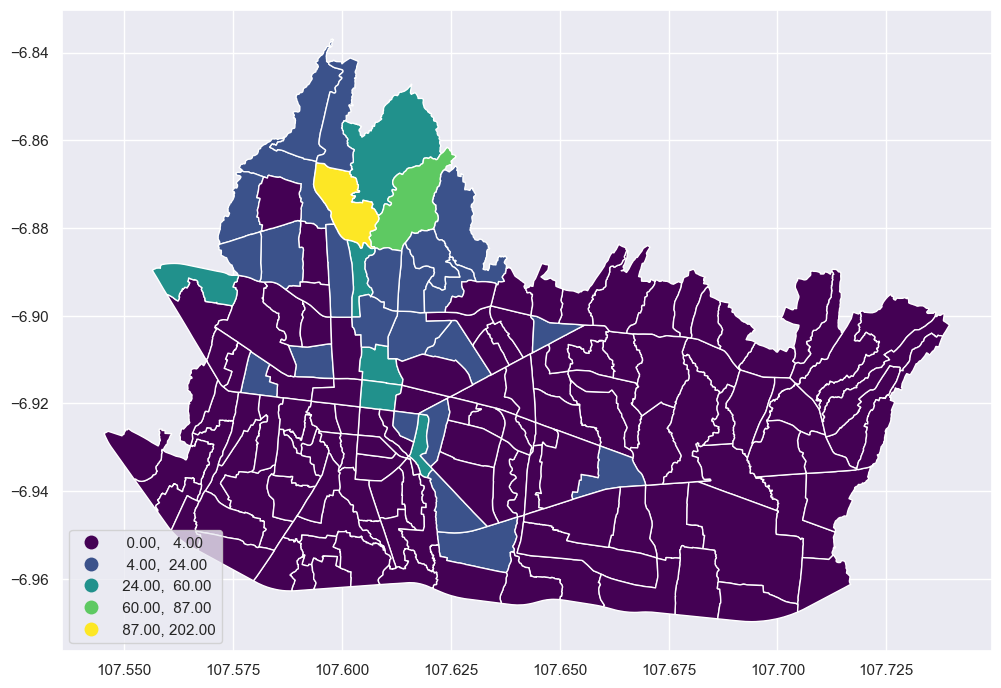

In [62]:
# Let's plot our data - in spatial join you need to make sure the accuracy of your operation is correct
fig, ax = plt.subplots(figsize=(12,10))
airbnbcs_bdg.plot(ax=ax, column="listings_count", scheme='fisher_jenks', cmap="viridis", legend= True, legend_kwds={'loc': 'lower left'})
#airbnb_jkt_csactive.plot(ax=ax, color='black', markersize=2);

<Axes: >

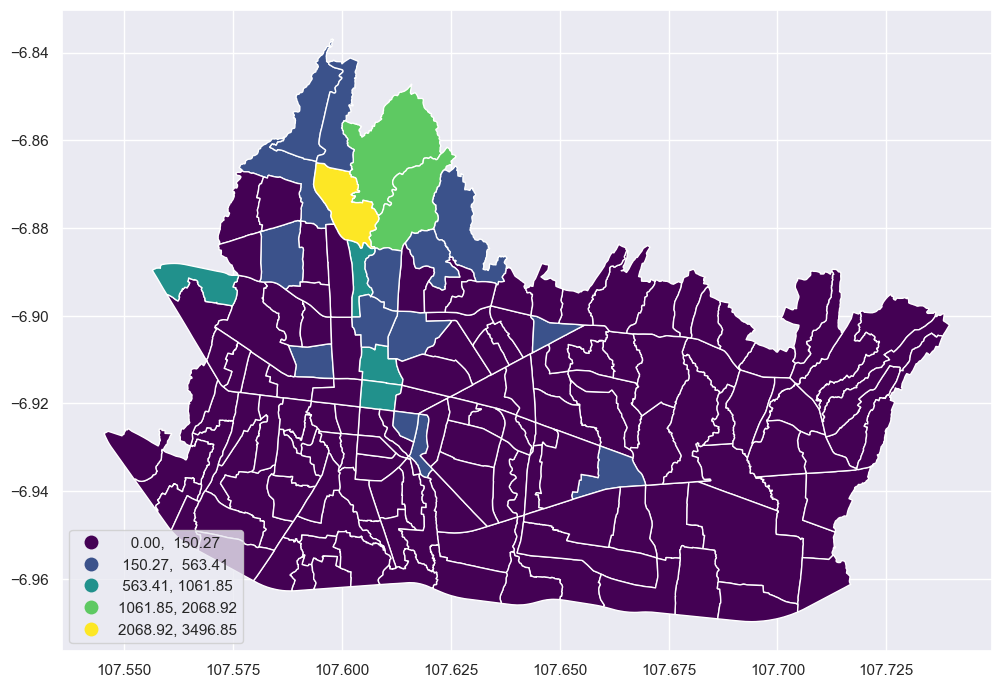

In [63]:
# Let's plot our data - in spatial join you need to make sure the accuracy of your operation is correct
fig, ax = plt.subplots(figsize=(12,10))
airbnbcs_bdg1.plot(ax=ax, column="PPB", scheme='fisher_jenks', cmap="viridis", legend= True, legend_kwds={'loc': 'lower left'})

In [64]:
airbnbcs_jkt.columns

Index(['name', 'geometry', 'KEL_NAME', 'listings_count'], dtype='object')

In [65]:
airbnbcs_jkt = airbnbcs_jkt[['name','geometry','listings_count']]

In [66]:
airbnbcs_bdg = airbnbcs_bdg[['name','geometry','listings_count']]

<Axes: >

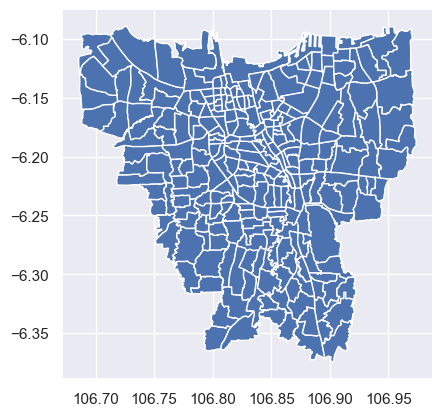

In [67]:
airbnbrev_jkt.plot()

In [68]:
# Let's join the airbnbcs data with airbnbrev data
airbnb_jkt = pd.merge(airbnbcs_jkt, airbnbrev_jkt, on='name', how='outer')
airbnb_bdg = pd.merge(airbnbcs_bdg, airbnbrev_bdg, on='name', how='outer')

In [69]:
airbnb_jkt['geometry']=airbnb_jkt['geometry_x']

In [70]:
airbnb_bdg['geometry']=airbnb_bdg['geometry_x']

In [71]:
airbnb_jkt=airbnb_jkt[['name', 'listings_count', 'Zipcode',
       'Neighborhood', 'Metropolitan Statistical Area',
       'Average Daily Rate (USD)', 'Average Daily Rate (Native)',
       'Annual Revenue LTM (USD)', 'Annual Revenue LTM (Native)',
       'Occupancy Rate LTM', 'Number of Bookings LTM', 'Number of Reviews',
       'Bedrooms', 'Bathrooms', 'Max Guests', 'Response Rate',
       'Security Deposit (USD)', 'Security Deposit (Native)',
       'Cleaning Fee (USD)', 'Cleaning Fee (Native)', 'Extra People Fee (USD)',
       'Extra People Fee (Native)', 'Published Nightly Rate (USD)',
       'Published Monthly Rate (USD)', 'Published Weekly Rate (USD)',
       'Minimum Stay', 'Count Reservation Days LTM',
       'Count Available Days LTM', 'Count Blocked Days LTM',
       'Number of Photos', 'Instantbook Enabled', 'Latitude', 'Longitude',
       'Overall Rating', 'Airbnb Communication Rating',
       'Airbnb Accuracy Rating', 'Airbnb Cleanliness Rating',
       'Airbnb Checkin Rating', 'Airbnb Location Rating',
       'Airbnb Value Rating', 'Airbnb Property Plus', 'Airbnb Home Collection',
       'License', 'Airbnb Property ID', 'Airbnb Host ID', 'index_right',
       'geometry']]

In [72]:
airbnb_bdg=airbnb_bdg[['name', 'listings_count', 'Zipcode',
       'Neighborhood', 'Metropolitan Statistical Area',
       'Average Daily Rate (USD)', 'Average Daily Rate (Native)',
       'Annual Revenue LTM (USD)', 'Annual Revenue LTM (Native)',
       'Occupancy Rate LTM', 'Number of Bookings LTM', 'Number of Reviews',
       'Bedrooms', 'Bathrooms', 'Max Guests', 'Response Rate',
       'Security Deposit (USD)', 'Security Deposit (Native)',
       'Cleaning Fee (USD)', 'Cleaning Fee (Native)', 'Extra People Fee (USD)',
       'Extra People Fee (Native)', 'Published Nightly Rate (USD)',
       'Published Monthly Rate (USD)', 'Published Weekly Rate (USD)',
       'Minimum Stay', 'Count Reservation Days LTM',
       'Count Available Days LTM', 'Count Blocked Days LTM',
       'Number of Photos', 'Instantbook Enabled', 'Latitude', 'Longitude',
       'Overall Rating', 'Airbnb Communication Rating',
       'Airbnb Accuracy Rating', 'Airbnb Cleanliness Rating',
       'Airbnb Checkin Rating', 'Airbnb Location Rating',
       'Airbnb Value Rating', 'Airbnb Property Plus', 'Airbnb Home Collection',
       'License', 'Airbnb Property ID', 'Airbnb Host ID', 'index_right',
       'geometry']]

In [73]:
airbnb_jkt.to_file('airbnb_jkt_regions.shp')

In [74]:
airbnb_bdg.to_file('airbnb_bdg_regions.shp')

### Merging with OSM Data (Explanatory Variables)

<Axes: >

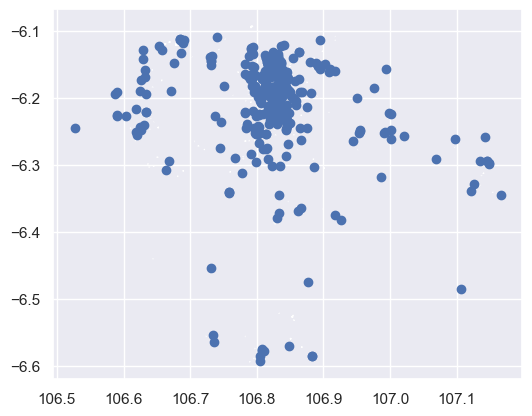

In [75]:
accommodation_jkt = gpd.read_file(os.path.join('accommodation_jkt.geojson'))
accommodation_jkt.plot()

<Axes: >

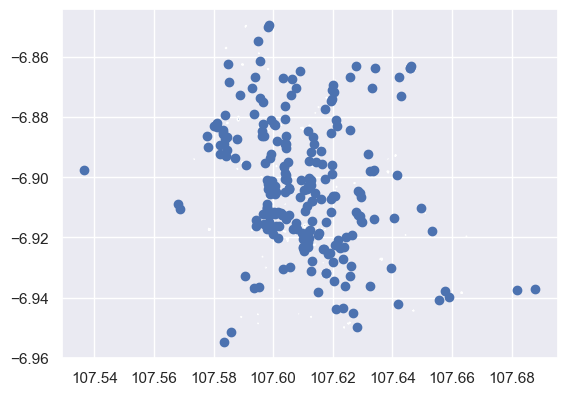

In [76]:
accommodation_bdg = gpd.read_file(os.path.join('accommodation_bdg.geojson'))
accommodation_bdg.plot()

<Axes: >

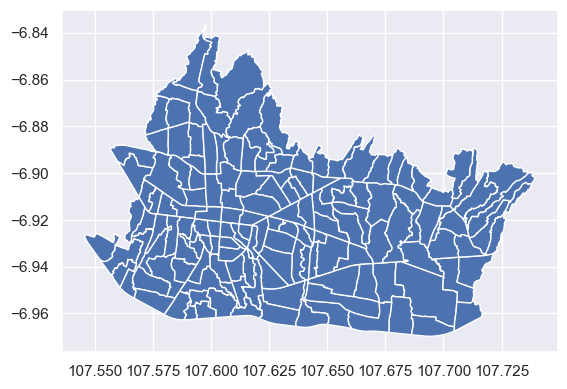

In [77]:
# Data Sources (Bandung)
# Read the Airbnb listings per-kelurahan (polygon data)
airbnb_bdg_kel= gpd.read_file(os.path.join('Airbnb_bdg_regions.shp'))
# Read the Airbnb listings per-kelurahan (cs) data (polygon data)
airbnb_jkt_kel = gpd.read_file(os.path.join('Airbnb_jkt_regions.shp'))

# Read in POI Spatial Data (point data)
Mall = gpd.read_file(os.path.join('shopping_bdg.geojson'))
Restaurant = gpd.read_file(os.path.join('restaurants_bdg.geojson'))
Hotels = gpd.read_file(os.path.join('accommodation_bdg.geojson'))
Parks = gpd.read_file(os.path.join('parks_bdg.geojson'))
Attractions = gpd.read_file(os.path.join('attractions_bdg.geojson'))

airbnb_bdg_kel.plot()

In [78]:
airbnb_bdg_all = airbnb_bdg_kel.fillna(0)
airbnb_bdg_all

,name,listings_c,Zipcode,Neighborho,Metropolit,Average Da,Average _1,Annual Rev,Annual R_1,Occupancy,...,Airbnb Che,Airbnb Loc,Airbnb Val,Airbnb Pro,Airbnb Hom,License,Airbnb P_1,Airbnb Hos,index_righ,geometry
0,Ancol,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,"POLYGON ((107.61490 -6.93250, 107.61526 -6.932..."
1,Antapani Kidul,2.0,0.0,0.0,0.0,110.23,1581900.00,5258.0,75421700.0,0.533,...,20.0,20.0,20.0,0.0,0.0,0.0,40547106.0,2.803820e+08,40.0,"POLYGON ((107.66681 -6.93244, 107.66673 -6.932..."
2,Antapani Kulon,3.0,0.0,0.0,0.0,113.78,1643736.00,3341.0,48106000.0,0.484,...,29.0,28.0,29.0,0.0,0.0,0.0,57892065.0,3.512461e+08,54.0,"POLYGON ((107.66227 -6.91417, 107.66152 -6.913..."
3,Antapani Tengah,2.0,0.0,0.0,0.0,84.42,1200913.00,8776.0,124560000.0,1.048,...,20.0,19.0,20.0,0.0,0.0,0.0,71233114.0,3.979716e+08,38.0,"POLYGON ((107.66799 -6.91601, 107.66808 -6.916..."
4,Antapani Wetan,1.0,0.0,0.0,0.0,39.65,578207.00,6145.0,89622040.0,0.480,...,10.0,9.0,9.0,0.0,0.0,0.0,22758959.0,1.681001e+08,17.0,"POLYGON ((107.66694 -6.90416, 107.66692 -6.904..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Sukawarna,8.0,0.0,0.0,0.0,167.50,2355230.00,5351.0,75743723.0,1.494,...,78.0,77.0,74.0,0.0,0.0,0.0,185915746.0,1.002053e+09,912.0,"POLYGON ((107.58107 -6.89221, 107.58070 -6.892..."
147,Tamansari,8.0,0.0,0.0,0.0,259.73,2040908.00,7597.0,80086046.0,2.177,...,75.0,74.0,72.0,0.0,0.0,0.0,132625158.0,6.169191e+08,264.0,"POLYGON ((107.60445 -6.90718, 107.60443 -6.906..."
148,Turangga,1.0,0.0,0.0,0.0,15.07,15.07,211.0,211.0,0.152,...,10.0,10.0,10.0,0.0,0.0,0.0,16581793.0,1.065764e+08,84.0,"POLYGON ((107.63600 -6.94723, 107.63339 -6.948..."
149,Warungmuncang,3.0,0.0,0.0,0.0,41.94,605876.00,2200.0,31985714.0,0.720,...,29.0,28.0,30.0,0.0,0.0,0.0,52728726.0,9.966591e+07,432.0,"POLYGON ((107.57625 -6.91746, 107.57672 -6.917..."


In [79]:
bdg

,name,geometry
0,Ledeng,"POLYGON ((107.60048 -6.84212, 107.60188 -6.841..."
1,Isola,"POLYGON ((107.59757 -6.83688, 107.59775 -6.836..."
2,Cirangrang,"POLYGON ((107.58644 -6.95047, 107.58681 -6.950..."
3,Binong,"POLYGON ((107.64318 -6.93182, 107.64309 -6.932..."
4,Gumuruh,"POLYGON ((107.63661 -6.92798, 107.63741 -6.928..."
...,...,...
146,Caringin,"POLYGON ((107.56763 -6.93840, 107.56762 -6.938..."
147,Cigondewah Rahayu,"POLYGON ((107.56699 -6.95358, 107.56641 -6.953..."
148,Cigondewah Kidul,"POLYGON ((107.56076 -6.94896, 107.56040 -6.948..."
149,Cigondewah Kaler,"POLYGON ((107.55894 -6.93065, 107.55914 -6.930..."


In [85]:
# Perform Spatial Join on POIs data
data_mall = gpd.sjoin(Mall, bdg, op="within")
data_mall.columns

Index(['id', '@id', 'addr:city', 'addr:full', 'addr:housenumber',
       'addr:postcode', 'addr:street', 'air_conditioning', 'alt_name', 'atm',
       'building', 'building:levels', 'building:roof', 'building:structure',
       'building:use', 'building:walls', 'cuisine', 'currency:IDR',
       'description', 'internet_access', 'layer', 'name_left', 'name:id',
       'old_name', 'opening_hours', 'opening_hours:covid19', 'operator',
       'payment:cash', 'payment:coins', 'payment:debit_cards',
       'payment:electronic_purses', 'phone', 'shop', 'smoking', 'source',
       'start_date', 'website', 'wheelchair', 'wikidata', 'geometry',
       'index_right', 'name_right'],
      dtype='object')

In [86]:
#Group the listings that has the same KELURAHAN code information
grouped = data_mall.groupby("name_right").size()
df_mall = grouped.to_frame().reset_index()
df_mall.columns = ['nama_kelur', 'attractions']
df_mall

,nama_kelur,attractions
0,Babakan Ciamis,1
1,Babakan Surabaya,2
2,Braga,3
3,Cibangkong,1
4,Cijerah,1
5,Cipaganti,3
6,Cipedes,2
7,Cirangrang,1
8,Ciroyom,1
9,Citarum,2


In [87]:
# Perform Spatial Join on POIs data
data_attractions = gpd.sjoin(Attractions, bdg, op="within")
#Group the listings that has the same KELURAHAN code information
grouped = data_attractions.groupby("name_right").size()
df_attractions = grouped.to_frame().reset_index()
df_attractions.columns = ['nama_kelur', 'attractions']
df_attractions

# Perform Spatial Join on POIs data
data_restaurant = gpd.sjoin(Restaurant, bdg, op="within")
#Group the listings that has the same KELURAHAN code information
grouped = data_restaurant.groupby("name_right").size()
df_restaurant = grouped.to_frame().reset_index()
df_restaurant.columns = ['nama_kelur', 'restaurant']
df_restaurant

# Perform Spatial Join on POIs data
df_parks = gpd.sjoin(Parks, bdg, op="within")
#Group the listings that has the same KELURAHAN code information
grouped = df_parks.groupby("name_right").size()
df_parks = grouped.to_frame().reset_index()
df_parks.columns = ['nama_kelur', 'parks']
df_parks

# Perform Spatial Join on POIs data
data_hotels = gpd.sjoin(Hotels, bdg, op="within")
#Group the listings that has the same KELURAHAN code information
grouped = data_hotels.groupby("name_right").size()
df_hotels = grouped.to_frame().reset_index()
df_hotels.columns = ['nama_kelur', 'hotels']
df_hotels

,nama_kelur,hotels
0,Ancol,1
1,Antapani Kidul,1
2,Antapani Tengah,1
3,Arjuna,4
4,Babakan Ciamis,6
...,...,...
70,Sukaraja,1
71,Sukarasa,2
72,Sukawarna,8
73,Tamansari,14


In [89]:
airbnb_bdg_all

,name,listings_c,Zipcode,Neighborho,Metropolit,Average Da,Average _1,Annual Rev,Annual R_1,Occupancy,...,Airbnb Che,Airbnb Loc,Airbnb Val,Airbnb Pro,Airbnb Hom,License,Airbnb P_1,Airbnb Hos,index_righ,geometry
0,Ancol,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,"POLYGON ((107.61490 -6.93250, 107.61526 -6.932..."
1,Antapani Kidul,2.0,0.0,0.0,0.0,110.23,1581900.00,5258.0,75421700.0,0.533,...,20.0,20.0,20.0,0.0,0.0,0.0,40547106.0,2.803820e+08,40.0,"POLYGON ((107.66681 -6.93244, 107.66673 -6.932..."
2,Antapani Kulon,3.0,0.0,0.0,0.0,113.78,1643736.00,3341.0,48106000.0,0.484,...,29.0,28.0,29.0,0.0,0.0,0.0,57892065.0,3.512461e+08,54.0,"POLYGON ((107.66227 -6.91417, 107.66152 -6.913..."
3,Antapani Tengah,2.0,0.0,0.0,0.0,84.42,1200913.00,8776.0,124560000.0,1.048,...,20.0,19.0,20.0,0.0,0.0,0.0,71233114.0,3.979716e+08,38.0,"POLYGON ((107.66799 -6.91601, 107.66808 -6.916..."
4,Antapani Wetan,1.0,0.0,0.0,0.0,39.65,578207.00,6145.0,89622040.0,0.480,...,10.0,9.0,9.0,0.0,0.0,0.0,22758959.0,1.681001e+08,17.0,"POLYGON ((107.66694 -6.90416, 107.66692 -6.904..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Sukawarna,8.0,0.0,0.0,0.0,167.50,2355230.00,5351.0,75743723.0,1.494,...,78.0,77.0,74.0,0.0,0.0,0.0,185915746.0,1.002053e+09,912.0,"POLYGON ((107.58107 -6.89221, 107.58070 -6.892..."
147,Tamansari,8.0,0.0,0.0,0.0,259.73,2040908.00,7597.0,80086046.0,2.177,...,75.0,74.0,72.0,0.0,0.0,0.0,132625158.0,6.169191e+08,264.0,"POLYGON ((107.60445 -6.90718, 107.60443 -6.906..."
148,Turangga,1.0,0.0,0.0,0.0,15.07,15.07,211.0,211.0,0.152,...,10.0,10.0,10.0,0.0,0.0,0.0,16581793.0,1.065764e+08,84.0,"POLYGON ((107.63600 -6.94723, 107.63339 -6.948..."
149,Warungmuncang,3.0,0.0,0.0,0.0,41.94,605876.00,2200.0,31985714.0,0.720,...,29.0,28.0,30.0,0.0,0.0,0.0,52728726.0,9.966591e+07,432.0,"POLYGON ((107.57625 -6.91746, 107.57672 -6.917..."


## References:
https://towardsdatascience.com/data-exploration-on-airbnb-singapore-01-40698c54cac3
https://github.com/Zhitaow/Airbnb-Data-Analysis/blob/master/airbnb.ipynb
